# Elo Prediction

Use Regression to predict Chess Elo rating. Here are the game statistics we are trying to explore: average centipawn loss per move, blunder rate, winning chance change, openings. 

## Import Packages and Data

In [5]:
import os
import glob
import pandas as pd
import numpy as np

## Process Data and Add Winning Chances Column

In [47]:
winning_chance_table = pd.read_csv('winning_chances_all_moves.csv')
# Define input and output directories
input_dir = "../Cleaned_Analyzed_Games"
output_dir = "../Processed_With_WinningChances"
os.makedirs(output_dir, exist_ok=True)
# Define the intervals to use in the process_chess_data function
intervals = np.arange(-13, 13.2, 0.2)

In [50]:
def process_chess_data(df, winning_chance_table=pd.read_csv('winning_chances_all_moves.csv'), intervals=np.arange(-13, 13.2, 0.2)):
    """
    Processes chess data by binning evaluation values, merging with winning chances,
    and computing WCL, LCL, Player, and 'a' columns.

    Parameters:
    df (pd.DataFrame): DataFrame containing chess game data with 'Evaluation', 'GameID', and 'MoveNumber' columns.
    winning_chance_table (pd.DataFrame): DataFrame containing winning chances with 'Interval', 'WinningChance', 'LosingChance', and 'TotalGames' columns.
    intervals (np.array): Numpy array of interval edges used for binning evaluations.

    Returns:
    pd.DataFrame: Modified DataFrame with additional columns added.
    """
    import numpy as np
    import pandas as pd

    df['Evaluation'] = df['Evaluation'].clip(lower=-20, upper=20)

    # Ensure intervals are rounded to one decimal place
    intervals = np.round(intervals, decimals=1)
    edges = [-np.inf] + list(intervals) + [np.inf]

    # Create bin labels
    bin_labels = []
    for i in range(len(edges) - 1):
        lower = edges[i]
        upper = edges[i + 1]
        if np.isneginf(lower):
            label = f"(-infty, {upper}]"
        elif np.isposinf(upper):
            label = f"({lower}, infty)"
        else:
            label = f"({lower}, {upper}]"
        bin_labels.append(label)

    # Ensure that the bin labels in 'winning_chance_table' match the ones we're creating
    # This is important for a correct merge
    winning_chance_table['Interval'] = winning_chance_table['Interval'].astype(str)
    bin_labels = [str(label) for label in bin_labels]

    # Bin the 'Evaluation' values in 'df' to create an 'Interval' column
    df['Interval'] = pd.cut(
        df['Evaluation'],
        bins=edges,
        labels=bin_labels,
        right=True,
        include_lowest=True,
    )

    # Ensure 'Interval' in 'df' is of type string
    df['Interval'] = df['Interval'].astype(str)

    # Select the columns to merge
    columns_to_merge = ['Interval', 'WinningChance', 'LosingChance', 'TotalGames']

    # Merge 'df' with 'winning_chance_table' on 'Interval'
    df = df.merge(
        winning_chance_table[columns_to_merge],
        on='Interval',
        how='left'
    )

    # Compute 'WCL' and 'LCL' differences per game
    df['WCL'] = df.groupby('GameID')['WinningChance'].diff().abs()
    df['LCL'] = df.groupby('GameID')['LosingChance'].diff().abs()
    df['CentipawnLoss'] = df.groupby('GameID')['Evaluation'].diff().abs()

    # Assign 'Player' based on move number
    df['Player'] = np.where(df['MoveNumber'] % 2 != 0, 'White', 'Black')

    # Compute 'a' = max(|WCL|, |LCL|) for each move
    df['a'] = df[['WCL', 'LCL']].abs().max(axis=1)

    return df


In [51]:
# Define the function to process each file
def process_all_games(input_dir, output_dir, winning_chance_table, intervals):
    # Get all CSV files in the input directory
    file_paths = glob.glob(os.path.join(input_dir, "*.csv"))

    for file_path in file_paths:
        # Extract base filename and set the output path
        base_filename = os.path.basename(file_path)
        output_path = os.path.join(output_dir, base_filename)

        # Skip if the output file already exists
        if os.path.isfile(output_path):
            print(f"{output_path} already exists. Skipping.")
            continue

        print(f"Processing {file_path}...")

        # Load the game data
        df = pd.read_csv(file_path)

        # Process the data with process_chess_data
        df_processed = process_chess_data(df, winning_chance_table=winning_chance_table, intervals=intervals)

        # Save the processed data
        df_processed.to_csv(output_path, index=False)
        print(f"Processed data saved to {output_path}")

In [52]:
# Run the function to process all files
process_all_games(input_dir, output_dir, winning_chance_table, intervals)

Processing ../Cleaned_Analyzed_Games/twic1271_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1271_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1492_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1492_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1231_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1231_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1353_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1353_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1214_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1214_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1528_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1528_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1516_15_processed.csv...
Processed data saved to ../Processed_Wit

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_42575/1169387690.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processed data saved to ../Processed_With_WinningChances/twic921_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic944_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic944_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1369_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1369_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1357_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1357_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic922_20_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic922_20_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1211_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1211_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1251_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1251_15_processed.csv
Processing ../Cleaned_Analyz

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_42575/1169387690.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processed data saved to ../Processed_With_WinningChances/twic1274_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1488_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1488_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1255_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1255_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1450_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1450_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1557_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1557_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1215_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1215_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1391_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1391_16_processed.csv
Processing ../Cleaned_A

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_42575/1169387690.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processed data saved to ../Processed_With_WinningChances/twic921_20_processed.csv
Processing ../Cleaned_Analyzed_Games/twic938_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic938_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1396_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1396_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1370_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1370_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1237_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1237_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1472_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1472_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1535_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1535_15_processed.csv
Processing ../Cleaned_Anal

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_42575/1169387690.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processed data saved to ../Processed_With_WinningChances/twic1375_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1393_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1393_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1229_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1229_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1217_16_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1217_16_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1269_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1269_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1257_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1257_15_processed.csv
Processing ../Cleaned_Analyzed_Games/twic1452_15_processed.csv...
Processed data saved to ../Processed_With_WinningChances/twic1452_15_processed.csv
Processing ../Cleaned_A

In [68]:
# display an example
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
example_table = pd.read_csv("../Processed_With_WinningChances/twic1200_16_processed.csv")
example_table.head(10)

GameID   WhiteName BlackName  WhiteElo  BlackElo  LineStart  WhiteFideId  \
0     1.0  Grischuk,A    Leko,P    2785.0    2679.0        0.0    4126025.0   
1     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
2     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
3     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
4     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
5     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
6     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
7     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
8     1.0         NaN       NaN       NaN       NaN        NaN          NaN   
9     1.0         NaN       NaN       NaN       NaN        NaN          NaN   

   BlackFideId    Year            Opening Variation   Result  Move  \
0     703303.0  2017.0  Queen's pawn game   Unknown  1/2-1/2    d4   
1          NaN     NaN                NaN       NaN      NaN   Nf6   
2          NaN     NaN                NaN       NaN      NaN   Bf4   
3          NaN     NaN                NaN       NaN      NaN    e6   
4          NaN     NaN                NaN       NaN      NaN    e3   
5          NaN     NaN                NaN       NaN      NaN    c5   
6          NaN     NaN                NaN       NaN      NaN   Nf3   
7          NaN     NaN                NaN       NaN      NaN  cxd4   
8          NaN     NaN                NaN       NaN      NaN  exd4   
9          NaN     NaN                NaN       NaN      NaN    b6   

  Old_Evaluation  Evaluation  LineEnd  MoveNumber     Interval  WinningChance  \
0           0.24        0.24     39.0         1.0   (0.2, 0.4]      43.303525   
1           0.21        0.21      NaN         2.0   (0.2, 0.4]      43.303525   
2           0.07        0.07      NaN         3.0  (-0.0, 0.2]      41.998415   
3           0.24        0.24      NaN         4.0   (0.2, 0.4]      43.303525   
4           0.16        0.16      NaN         5.0  (-0.0, 0.2]      41.998415   
5            0.2        0.20      NaN         6.0  (-0.0, 0.2]      41.998415   
6           0.21        0.21      NaN         7.0   (0.2, 0.4]      43.303525   
7           0.41        0.41      NaN         8.0   (0.4, 0.6]      44.908290   
8           0.39        0.39      NaN         9.0   (0.2, 0.4]      43.303525   
9           0.39        0.39      NaN        10.0   (0.2, 0.4]      43.303525   

   LosingChance  TotalGames       WCL       LCL  CentipawnLoss Player  \
0     36.317098   1165016.0       NaN       NaN            NaN  White   
1     36.317098   1165016.0  0.000000  0.000000           0.03  Black   
2     36.837735   1106637.0  1.305110  0.520637           0.14  White   
3     36.317098   1165016.0  1.305110  0.520637           0.17  Black   
4     36.837735   1106637.0  1.305110  0.520637           0.08  White   
5     36.837735   1106637.0  0.000000  0.000000           0.04  Black   
6     36.317098   1165016.0  1.305110  0.520637           0.01  White   
7     34.665863   1030371.0  1.604765  1.651235           0.20  Black   
8     36.317098   1165016.0  1.604765  1.651235           0.02  White   
9     36.317098   1165016.0  0.000000  0.000000           0.00  Black   

          a  
0       NaN  
1  0.000000  
2  1.305110  
3  1.305110  
4  1.305110  
5  0.000000  
6  1.305110  
7  1.651235  
8  1.651235  
9  0.000000

## Generate Summarized Statistics per Game

### Combine the files

In [55]:
file_paths = glob.glob("../Processed_With_WinningChances/*.csv")
data_frames = []
last_game_id = 0

for file in file_paths:
    # Load the current file
    df = pd.read_csv(file, low_memory=False)
    
    # Drop rows where only 'GameID' is NaN
    df = df[~df['GameID'].isna()]
    
    # Get unique GameIDs in this file and sort them
    unique_game_ids = sorted(df['GameID'].unique())
    id_mapping = {}
    
    # Create a mapping of original GameIDs to normalized IDs
    for i, game_id in enumerate(unique_game_ids, start=last_game_id + 1):
        id_mapping[game_id] = i  # Map each original GameID to a new, consecutive ID
    
    # Apply the mapping to the GameID column
    df['GameID'] = df['GameID'].map(id_mapping)
    
    # Update last_game_id to the maximum normalized ID used so far
    last_game_id = max(id_mapping.values())
    
    # Append the dataframe to the list
    data_frames.append(df)

    # Print diagnostic information
    print(f"Processed file: {os.path.basename(file)}, unique game count: {len(unique_game_ids)}, updated last_game_id: {last_game_id}")

# Concatenate all data frames
df = pd.concat(data_frames, ignore_index=True)

# Verify final GameID range
print(f"Final GameID range: {df['GameID'].min()} to {df['GameID'].max()}")

# Check for any missing GameIDs
missing_game_ids = sorted(set(range(1, int(df['GameID'].max()) + 1)) - set(df['GameID'].unique()))
print(f"Missing GameIDs after processing: {missing_game_ids}")
print(f"Total missing GameIDs: {len(missing_game_ids)}")

Processed file: twic1271_15_processed.csv, unique game count: 2648, updated last_game_id: 2648
Processed file: twic1492_15_processed.csv, unique game count: 7528, updated last_game_id: 10176
Processed file: twic1231_16_processed.csv, unique game count: 2659, updated last_game_id: 12835
Processed file: twic1353_16_processed.csv, unique game count: 2952, updated last_game_id: 15787
Processed file: twic1214_15_processed.csv, unique game count: 3141, updated last_game_id: 18928
Processed file: twic1528_15_processed.csv, unique game count: 7610, updated last_game_id: 26538
Processed file: twic1516_15_processed.csv, unique game count: 7076, updated last_game_id: 33614
Processed file: twic959_20_processed.csv, unique game count: 1728, updated last_game_id: 35342
Processed file: twic940_15_processed.csv, unique game count: 2174, updated last_game_id: 37516
Processed file: twic1470_16_processed.csv, unique game count: 6707, updated last_game_id: 44223
Processed file: twic1537_15_processed.csv, 

In [56]:
unique_game_counts = [pd.read_csv(file, usecols=['GameID']).nunique()['GameID'] for file in file_paths]
total_games_expected = sum(unique_game_counts)
print(f"Total expected unique GameIDs (pre-concatenation): {total_games_expected}")

Total expected unique GameIDs (pre-concatenation): 1475298


In [57]:
df.shape

(126903749, 26)

In [58]:
### Save the combined dataframe locally
output_path = "processed_chess_data.csv"
df.to_csv(output_path, index=False)
print(f"DataFrame saved to {output_path}")

DataFrame saved to processed_chess_data.csv


In [6]:
df = pd.read_csv("processed_chess_data.csv")

In [7]:
### Remove moves with "Mate in 0"
df_cleaned = df[~df['Old_Evaluation'].isin(['+M0', '-M0', 'M0'])]
print(f"Rows removed: {len(df) - len(df_cleaned)}")
print(f"Remaining rows: {len(df_cleaned)}")

Rows removed: 133681
Remaining rows: 126770068


### Define functions to compute features

In [8]:
def calculate_blunder_rate(centipawn_loss, threshold=2.0):
    """Calculate blunder rate based on centipawn threshold."""
    blunders = centipawn_loss > threshold
    return blunders.mean()

def calculate_contextual_blunder_rate(wcl, threshold=25):
    blunders = wcl >= threshold  # Identify moves with WCL above the threshold
    return blunders.mean() if len(wcl) > 0 else 0.0  # Return mean blunder rate

def calculate_mistake_rate(wcl, lower_threshold=14, upper_threshold=25):
    """
    Calculate the mistake rate based on WCL thresholds.

    Parameters:
    wcl (array-like): Winning chance loss values for each move.
    lower_threshold (float): Lower bound for mistakes (default: 0.14 or 14%).
    upper_threshold (float): Upper bound for mistakes (default: 0.25 or 25%).

    Returns:
    float: Fraction of moves considered mistakes.
    """
    mistakes = (wcl >= lower_threshold) & (wcl < upper_threshold)
    return mistakes.mean() if len(wcl) > 0 else 0.0

def calculate_inaccuracy_rate(wcl, lower_threshold=7, upper_threshold=14):
    """
    Calculate the inaccuracy rate based on WCL thresholds.

    Parameters:
    wcl (array-like): Winning chance loss values for each move.
    lower_threshold (float): Lower bound for inaccuracies (default: 0.07 or 7%).
    upper_threshold (float): Upper bound for inaccuracies (default: 0.14 or 14%).

    Returns:
    float: Fraction of moves considered inaccuracies.
    """
    inaccuracies = (wcl >= lower_threshold) & (wcl < upper_threshold)
    return inaccuracies.mean() if len(wcl) > 0 else 0.0

def calculate_opening_mistake_rate(centipawn_loss, moves=15, threshold=1.0):
    """Calculate mistake rate in the opening moves."""
    opening_losses = centipawn_loss[:moves]
    mistakes = opening_losses > threshold
    return mistakes.mean()

def calculate_endgame_mistake_rate(centipawn_loss, moves=15, threshold=1.0):
    """Calculate mistake rate in the last few moves (endgame)."""
    endgame_losses = centipawn_loss[-moves:]
    mistakes = endgame_losses > threshold
    return mistakes.mean()

In [9]:
def summarize_game_stats(df):
    game_stats = []

    for game_id, game_data in df.groupby("GameID"):
        # Separate by player color before calculating metrics
        white_moves = game_data[game_data["Player"] == "White"]
        black_moves = game_data[game_data["Player"] == "Black"]

        # Get centipawn loss and winning chance loss arrays for each player
        white_centipawn_loss = white_moves["CentipawnLoss"].dropna().to_numpy()
        black_centipawn_loss = black_moves["CentipawnLoss"].dropna().to_numpy()
        white_wcl = white_moves["WCL"].dropna().to_numpy()
        black_wcl = black_moves["WCL"].dropna().to_numpy()


        total_moves = game_data["MoveNumber"].max()

        # Calculate stats for White
        white_stats = {
            "GameID": game_id,
            "Player": "White",
            "Avg_CPL": white_centipawn_loss.mean() * 100,
            "Avg_WCL": white_wcl.mean() if len(white_wcl) > 0 else 0,
            "Blunder_Rate": calculate_blunder_rate(white_centipawn_loss),
            "Contextual_Blunder_Rate": calculate_contextual_blunder_rate(white_wcl),
            "Mistake_Rate": calculate_mistake_rate(white_wcl),
            "Inaccuracy_Rate": calculate_inaccuracy_rate(white_wcl),
            "Std_Dev_CPL": np.std(white_centipawn_loss),
            "Std_Dev_WCL": np.std(white_wcl),
            "Opening_Mistake": calculate_opening_mistake_rate(white_centipawn_loss),
            "Endgame_Mistake": calculate_endgame_mistake_rate(white_centipawn_loss),
            "Result": 1 if game_data['Result'].iloc[0] == "1-0" else 0.5 if game_data['Result'].iloc[0] == "1/2-1/2" else 0,
            "Opening": game_data['Opening'].iloc[0],
            "TotalMoves": total_moves,
            "Elo": game_data['WhiteElo'].iloc[0]
        }

        # Calculate stats for Black
        black_stats = {
            "GameID": game_id,
            "Player": "Black",
            "Avg_CPL": black_centipawn_loss.mean() * 100,
            "Avg_WCL": black_wcl.mean() if len(black_wcl) > 0 else 0,
            "Blunder_Rate": calculate_blunder_rate(black_centipawn_loss),
            "Contextual_Blunder_Rate": calculate_contextual_blunder_rate(black_wcl),
            "Mistake_Rate": calculate_mistake_rate(black_wcl),
            "Inaccuracy_Rate": calculate_inaccuracy_rate(black_wcl),
            "Std_Dev_CPL": np.std(black_centipawn_loss),
            "Std_Dev_WCL": np.std(black_wcl),
            "Opening_Mistake": calculate_opening_mistake_rate(black_centipawn_loss),
            "Endgame_Mistake": calculate_endgame_mistake_rate(black_centipawn_loss),
            "Result": 1 if game_data['Result'].iloc[0] == "0-1" else 0.5 if game_data['Result'].iloc[0] == "1/2-1/2" else 0,
            "Opening": game_data['Opening'].iloc[0],
            "TotalMoves": total_moves,
            "Elo": game_data['BlackElo'].iloc[0]
        }

        game_stats.append(white_stats)
        game_stats.append(black_stats)

    return pd.DataFrame(game_stats)


In [16]:
### Test on the first 10000 games first
df_test = df_cleaned[df_cleaned['GameID'] <= 10000]

In [17]:
for game_id, group in df_test.groupby("GameID"):
    if group["CentipawnLoss"].dropna().empty:
        print(f"GameID {game_id} has no valid CentipawnLoss data.")
    if group["WCL"].dropna().empty:
        print(f"GameID {game_id} has no valid WCL data.")

GameID 453 has no valid CentipawnLoss data.
GameID 453 has no valid WCL data.
GameID 1621 has no valid CentipawnLoss data.
GameID 1621 has no valid WCL data.
GameID 2020 has no valid CentipawnLoss data.
GameID 2020 has no valid WCL data.
GameID 2379 has no valid CentipawnLoss data.
GameID 2379 has no valid WCL data.
GameID 4640 has no valid CentipawnLoss data.
GameID 4640 has no valid WCL data.
GameID 6029 has no valid CentipawnLoss data.
GameID 6029 has no valid WCL data.
GameID 6236 has no valid CentipawnLoss data.
GameID 6236 has no valid WCL data.
GameID 6654 has no valid CentipawnLoss data.
GameID 6654 has no valid WCL data.
GameID 6655 has no valid CentipawnLoss data.
GameID 6655 has no valid WCL data.
GameID 6656 has no valid CentipawnLoss data.
GameID 6656 has no valid WCL data.
GameID 7049 has no valid CentipawnLoss data.
GameID 7049 has no valid WCL data.
GameID 7231 has no valid CentipawnLoss data.
GameID 7231 has no valid WCL data.
GameID 7551 has no valid CentipawnLoss dat

In [76]:
short_games = df_test[df_test['GameID'].isin([453, 1621, 2020, 2379, 4640])]
move_counts = short_games.groupby('GameID')['MoveNumber'].count()
print(move_counts)

GameID
453     1
1621    1
2020    1
2379    1
4640    1
Name: MoveNumber, dtype: int64


Actually, there are quite a few one move games. Probably due to forfeit. 

In [11]:
df_summary = summarize_game_stats(df_cleaned)
df_summary.shape

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_17410/4277686177.py:22: RuntimeWarning: Mean of empty slice.
  "Avg_CPL": white_centipawn_loss.mean() * 100,
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_17410/1290350398.py:4: RuntimeWarning: Mean of empty slice.
  return blunders.mean()
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/pytho

(2950596, 16)

In [18]:
df_test_summary = summarize_game_stats(df_test)

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_17410/4277686177.py:22: RuntimeWarning: Mean of empty slice.
  "Avg_CPL": white_centipawn_loss.mean() * 100,
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_17410/1290350398.py:4: RuntimeWarning: Mean of empty slice.
  return blunders.mean()
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/langsong/anaconda3/envs/guess_the_elo-env/lib/pytho

In [19]:
df_test_summary.tail(10)

GameID Player    Avg_CPL   Avg_WCL  Blunder_Rate  \
19990    9996  White   8.333333  0.641121           0.0   
19991    9996  Black   8.071429  0.530177           0.0   
19992    9997  White  16.103448  2.042247           0.0   
19993    9997  Black  15.000000  1.736761           0.0   
19994    9998  White   8.183673  0.938415           0.0   
19995    9998  Black   7.640000  1.029998           0.0   
19996    9999  White   7.614035  1.059982           0.0   
19997    9999  Black   6.500000  0.950109           0.0   
19998   10000  White   4.611111  0.853337           0.0   
19999   10000  Black   3.675676  0.704338           0.0   

       Contextual_Blunder_Rate  Mistake_Rate  Inaccuracy_Rate  Std_Dev_CPL  \
19990                      0.0      0.000000         0.000000     0.106092   
19991                      0.0      0.000000         0.000000     0.100413   
19992                      0.0      0.000000         0.103448     0.236035   
19993                      0.0      0.033333         0.033333     0.202205   
19994                      0.0      0.000000         0.020408     0.111313   
19995                      0.0      0.000000         0.000000     0.083947   
19996                      0.0      0.000000         0.017544     0.105809   
19997                      0.0      0.000000         0.017241     0.099416   
19998                      0.0      0.000000         0.027778     0.069413   
19999                      0.0      0.000000         0.000000     0.056140   

       Std_Dev_WCL  Opening_Mistake  Endgame_Mistake  Result  \
19990     1.320791              0.0         0.000000     0.5   
19991     1.121493              0.0         0.000000     0.5   
19992     3.553159              0.0         0.000000     0.5   
19993     3.224738              0.0         0.066667     0.5   
19994     1.907087              0.0         0.000000     0.5   
19995     1.552822              0.0         0.000000     0.5   
19996     1.912946              0.0         0.000000     0.5   
19997     1.738018              0.0         0.000000     0.5   
19998     1.701461              0.0         0.000000     0.5   
19999     1.373955              0.0         0.000000     0.5   

                 Opening  TotalMoves     Elo  
19990          Ruy Lopez        85.0  2323.0  
19991          Ruy Lopez        85.0  2283.0  
19992           Sicilian        60.0  2597.0  
19993           Sicilian        60.0  2484.0  
19994  Queen's pawn game       100.0  2722.0  
19995  Queen's pawn game       100.0  2507.0  
19996          Caro-Kann       116.0  2159.0  
19997          Caro-Kann       116.0  2509.0  
19998                QGD        74.0  2369.0  
19999                QGD        74.0  2422.0

In [88]:
df_summary.shape

(2950596, 16)

In [89]:
df_white = df_summary[df_summary['Player'] == 'White'].reset_index(drop=True)
df_black = df_summary[df_summary['Player'] == 'Black'].reset_index(drop=True)

In [15]:
### Save the summary dataframe locally
output_path = "summary_chess_data.csv"
df_summary.to_csv(output_path, index=False)
print(f"DataFrame saved to {output_path}")

DataFrame saved to summary_chess_data.csv


In [99]:
df_white.head(5)

GameID Player    Avg_CPL   Avg_WCL  Blunder_Rate  Contextual_Blunder_Rate  \
0       1  White  10.606061  0.664876           0.0                      0.0   
1       2  White   5.688312  0.602159           0.0                      0.0   
2       3  White   7.310345  1.043382           0.0                      0.0   
3       4  White  14.136364  1.255212           0.0                      0.0   
4       5  White  11.166667  1.389447           0.0                      0.0   

   Mistake_Rate  Inaccuracy_Rate  Std_Dev_CPL  Std_Dev_WCL  Opening_Mistake  \
0           0.0         0.000000     0.104038     1.231299              0.0   
1           0.0         0.000000     0.084765     1.262897              0.0   
2           0.0         0.034483     0.144368     2.220783              0.0   
3           0.0         0.022727     0.177682     2.046990              0.0   
4           0.0         0.055556     0.158263     2.388078              0.0   

   Endgame_Mistake  Result          Opening  TotalMoves     Elo  \
0         0.000000     0.5        Gruenfeld        68.0  2655.0   
1         0.000000     0.5              QGD       155.0  2771.0   
2         0.000000     0.5   Queen's Indian        60.0  2637.0   
3         0.066667     1.0  English opening        89.0  2736.0   
4         0.000000     0.5        Ruy Lopez       109.0  2710.0   

   Opponent_Rating  
0           2771.0  
1           2642.0  
2           2725.0  
3           2603.0  
4           2683.0

In [98]:
df_black.tail(5)

GameID Player    Avg_CPL   Avg_WCL  Blunder_Rate  \
1475293  1475294  Black  18.456522  1.868574      0.000000   
1475294  1475295  Black  24.608696  1.488083      0.043478   
1475295  1475296  Black  15.588235  1.064299      0.000000   
1475296  1475297  Black  13.459459  1.210554      0.000000   
1475297  1475298  Black  35.125000  3.450104      0.020833   

         Contextual_Blunder_Rate  Mistake_Rate  Inaccuracy_Rate  Std_Dev_CPL  \
1475293                 0.000000      0.021739         0.021739     0.285259   
1475294                 0.000000      0.043478         0.043478     0.519956   
1475295                 0.000000      0.000000         0.029412     0.127559   
1475296                 0.000000      0.000000         0.000000     0.166613   
1475297                 0.020833      0.041667         0.041667     0.441544   

         Std_Dev_WCL  Opening_Mistake  Endgame_Mistake  Result  \
1475293     3.513880              0.0         0.066667     0.0   
1475294     3.407222              0.0         0.066667     1.0   
1475295     1.796674              0.0         0.000000     1.0   
1475296     1.680620              0.0         0.000000     1.0   
1475297     5.989150              0.0         0.066667     0.0   

                 Opening  TotalMoves     Elo  Opponent_Rating  
1475293              QGD        93.0  2600.0           2734.0  
1475294         Sicilian        46.0  2739.0           2529.0  
1475295          English        68.0  2421.0           2634.0  
1475296  English opening        74.0  2618.0           2285.0  
1475297          Catalan        97.0  2275.0           2583.0

In [96]:
df_white.shape

(1475298, 17)

In [97]:
df_black.shape

(1475298, 17)

In [95]:
# Add Opponent_Rating for df_white and df_black
df_white['Opponent_Rating'] = df_black['Elo']
df_black['Opponent_Rating'] = df_white['Elo']

## Data Exploration

### Centipawn Loss

In [105]:
df_test_summary['Avg_CPL'].describe()

count    19937.000000
mean        34.238081
std         23.771643
min          1.666667
25%         18.756757
50%         27.977778
75%         42.100000
max        238.656250
Name: Avg_CPL, dtype: float64

313 average centipawn loss seems unusual to me. So I decide to investigate this game more closely. It turns out it is indeed a very low accuracy game. 

In [82]:
### Investigate unusual high CPL games
high_cpl_games = df_test_summary[df_test_summary['Avg_CPL'] > 300]
high_cpl_game_ids = high_cpl_games['GameID'].unique()
df_high_cpl_details = df_test[df_test['GameID'].isin(high_cpl_game_ids)]
df_high_cpl_details

GameID          WhiteName       BlackName  WhiteElo  BlackElo  \
194405    2283  Quintas Galeano,L  Ortega Serra,M    2091.0    2352.0   
194406    2283                NaN             NaN       NaN       NaN   
194407    2283                NaN             NaN       NaN       NaN   
194408    2283                NaN             NaN       NaN       NaN   
194409    2283                NaN             NaN       NaN       NaN   
194410    2283                NaN             NaN       NaN       NaN   
194411    2283                NaN             NaN       NaN       NaN   
194412    2283                NaN             NaN       NaN       NaN   
194413    2283                NaN             NaN       NaN       NaN   
194414    2283                NaN             NaN       NaN       NaN   
194415    2283                NaN             NaN       NaN       NaN   
194416    2283                NaN             NaN       NaN       NaN   
194417    2283                NaN             NaN       NaN       NaN   
194418    2283                NaN             NaN       NaN       NaN   
194419    2283                NaN             NaN       NaN       NaN   
194420    2283                NaN             NaN       NaN       NaN   
194421    2283                NaN             NaN       NaN       NaN   
194422    2283                NaN             NaN       NaN       NaN   
194423    2283                NaN             NaN       NaN       NaN   
194424    2283                NaN             NaN       NaN       NaN   
194425    2283                NaN             NaN       NaN       NaN   
194426    2283                NaN             NaN       NaN       NaN   
194427    2283                NaN             NaN       NaN       NaN   
194428    2283                NaN             NaN       NaN       NaN   
194429    2283                NaN             NaN       NaN       NaN   
194430    2283                NaN             NaN       NaN       NaN   
194431    2283                NaN             NaN       NaN       NaN   
194432    2283                NaN             NaN       NaN       NaN   
194433    2283                NaN             NaN       NaN       NaN   
194434    2283                NaN             NaN       NaN       NaN   
194435    2283                NaN             NaN       NaN       NaN   
194436    2283                NaN             NaN       NaN       NaN   
194437    2283                NaN             NaN       NaN       NaN   
194438    2283                NaN             NaN       NaN       NaN   
194439    2283                NaN             NaN       NaN       NaN   
194440    2283                NaN             NaN       NaN       NaN   
194441    2283                NaN             NaN       NaN       NaN   
194442    2283                NaN             NaN       NaN       NaN   
194443    2283                NaN             NaN       NaN       NaN   
194444    2283                NaN             NaN       NaN       NaN   
194445    2283                NaN             NaN       NaN       NaN   
194446    2283                NaN             NaN       NaN       NaN   
194447    2283                NaN             NaN       NaN       NaN   
194448    2283                NaN             NaN       NaN       NaN   
194449    2283                NaN             NaN       NaN       NaN   
194450    2283                NaN             NaN       NaN       NaN   
194451    2283                NaN             NaN       NaN       NaN   
194452    2283                NaN             NaN       NaN       NaN   
194453    2283                NaN             NaN       NaN       NaN   
194454    2283                NaN             NaN       NaN       NaN   
194455    2283                NaN             NaN       NaN       NaN   
194456    2283                NaN             NaN       NaN       NaN   
194457    2283                NaN             NaN       NaN       NaN   
194458    2283                NaN             NaN       NaN       

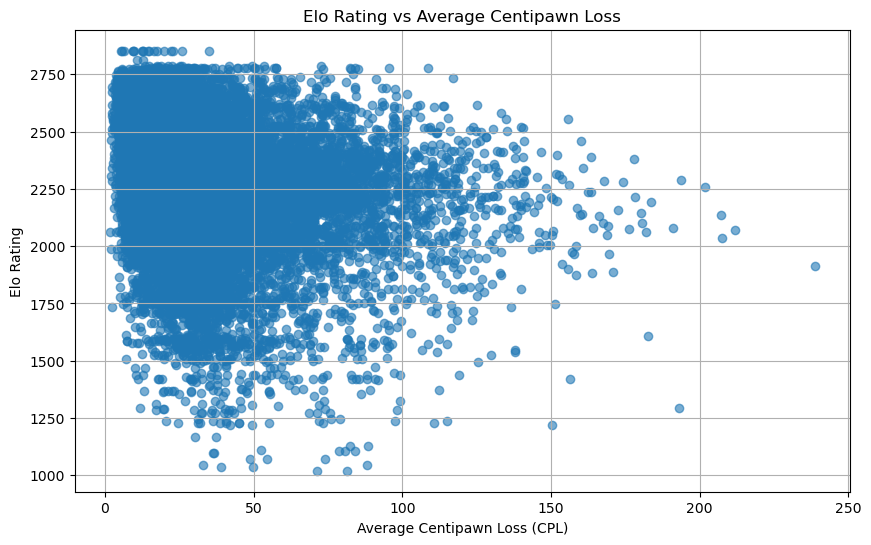

In [104]:
import matplotlib.pyplot as plt

# Scatter plot of Avg_CPL vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_test_summary['Avg_CPL'], df_test_summary['Elo'], alpha=0.6)
plt.title('Elo Rating vs Average Centipawn Loss')
plt.xlabel('Average Centipawn Loss (CPL)')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Winning Chance

In [23]:
df_test_summary['Avg_WCL'].describe()

count    20000.000000
mean         2.787022
std          1.432177
min          0.000000
25%          1.802403
50%          2.563065
75%          3.514545
max         23.045687
Name: Avg_WCL, dtype: float64

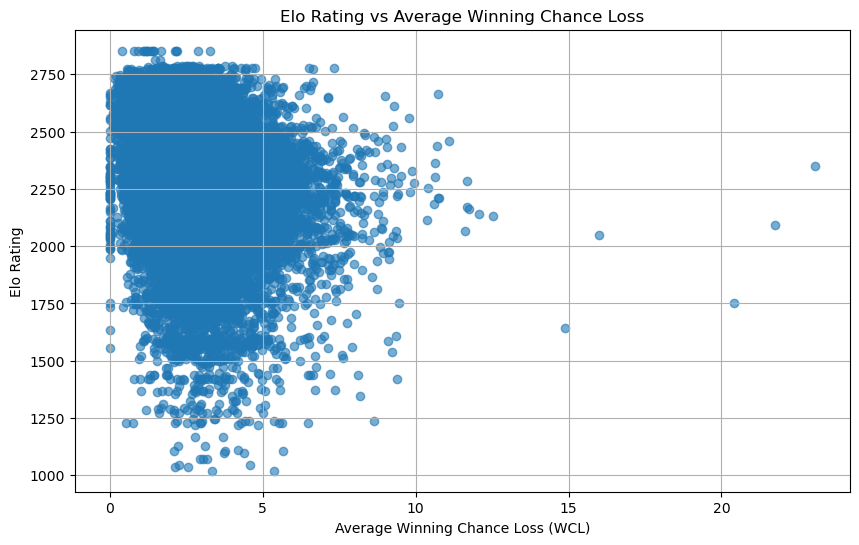

In [24]:
# Scatter plot of Avg_WCL vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_test_summary['Avg_WCL'], df_test_summary['Elo'], alpha=0.6)
plt.title('Elo Rating vs Average Winning Chance Loss')
plt.xlabel('Average Winning Chance Loss (WCL)')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Blunder Rate

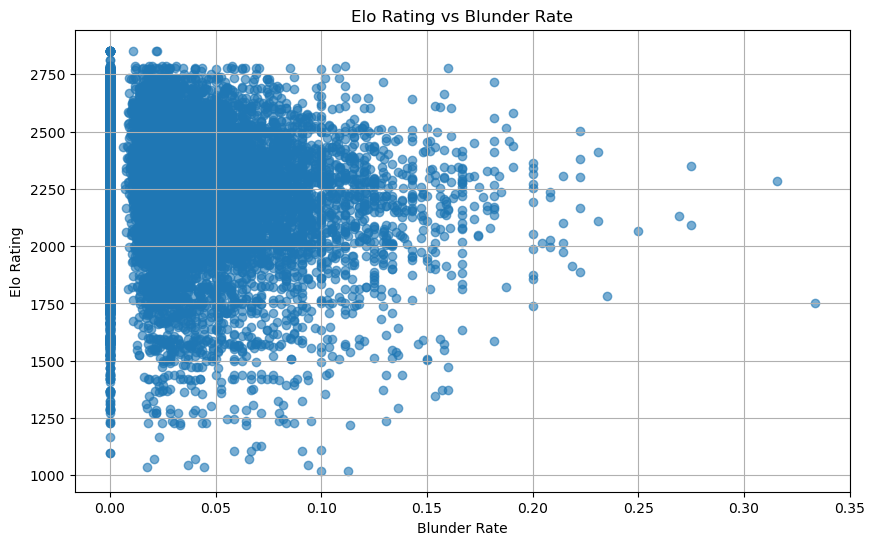

In [25]:
# Scatter plot of Blunder Rare vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_test_summary['Blunder_Rate'], df_test_summary['Elo'], alpha=0.6)
plt.title('Elo Rating vs Blunder Rate')
plt.xlabel('Blunder Rate')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Contextual Blunder Rate

In [26]:
df_test_summary['Contextual_Blunder_Rate'].describe()

count    20000.000000
mean         0.012369
std          0.021944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.021277
max          0.333333
Name: Contextual_Blunder_Rate, dtype: float64

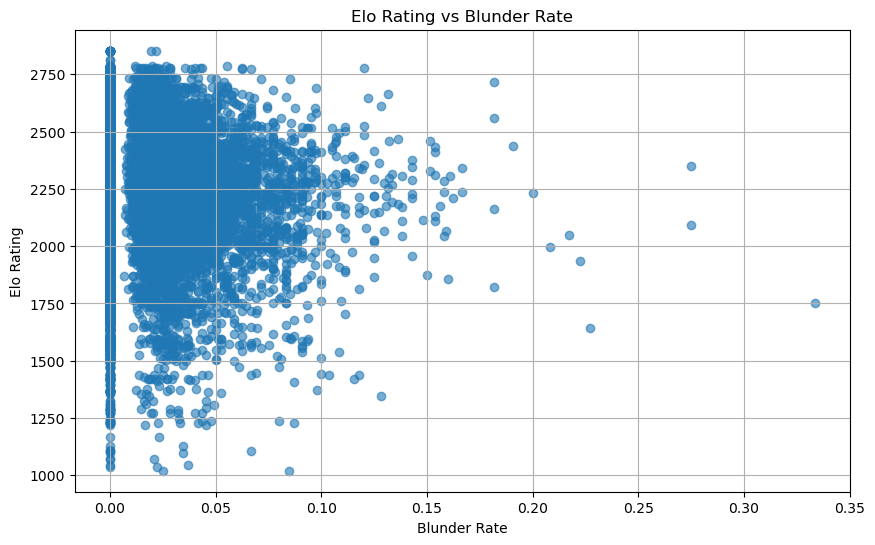

In [27]:
# Scatter plot of Blunder Rare vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_test_summary['Contextual_Blunder_Rate'], df_test_summary['Elo'], alpha=0.6)
plt.title('Elo Rating vs Blunder Rate')
plt.xlabel('Blunder Rate')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Mistake Rate

In [28]:
df_test_summary['Mistake_Rate'].describe()

count    20000.000000
mean         0.026037
std          0.031346
min          0.000000
25%          0.000000
50%          0.019608
75%          0.040816
max          0.307692
Name: Mistake_Rate, dtype: float64

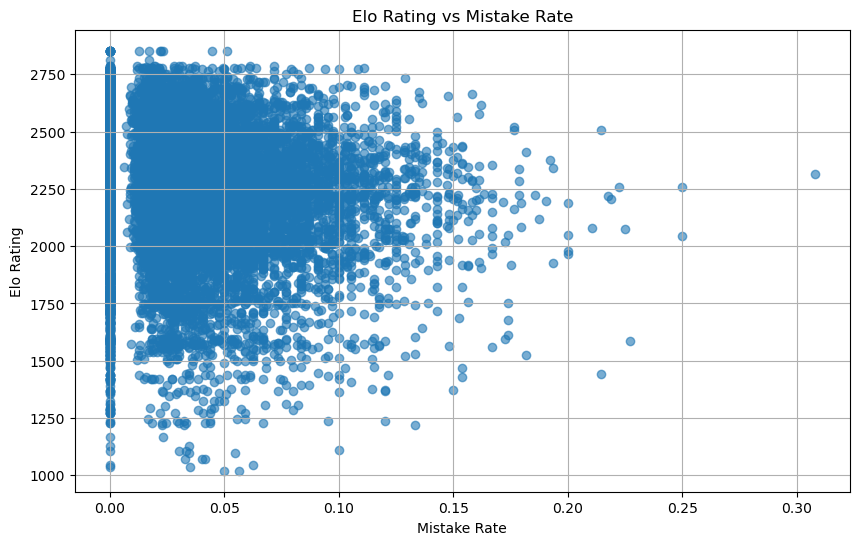

In [29]:
# Scatter plot of Mistake Rate vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_test_summary['Mistake_Rate'], df_test_summary['Elo'], alpha=0.6)
plt.title('Elo Rating vs Mistake Rate')
plt.xlabel('Mistake Rate')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Inaccuracy Rate

In [30]:
df_test_summary['Inaccuracy_Rate'].describe()

count    20000.000000
mean         0.071300
std          0.051900
min          0.000000
25%          0.032967
50%          0.064516
75%          0.102564
max          0.454545
Name: Inaccuracy_Rate, dtype: float64

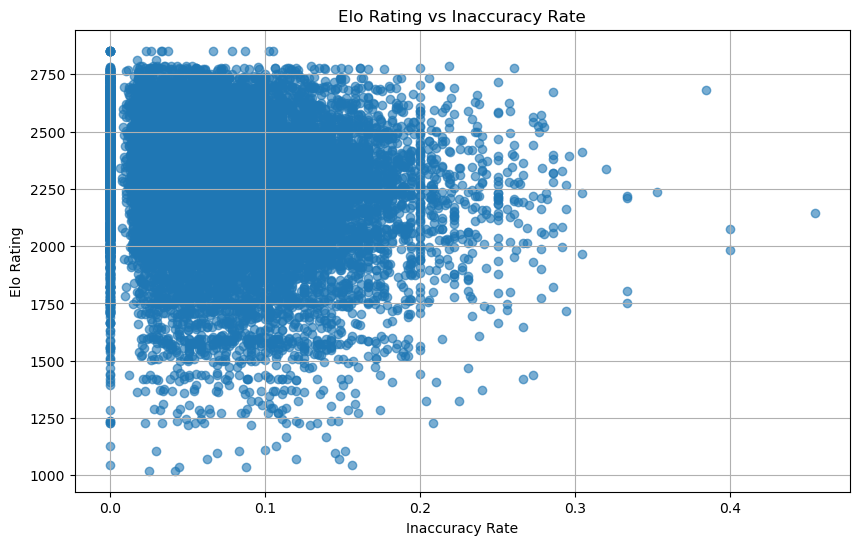

In [31]:
# Scatter plot of Inaccuracy Rate vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_test_summary['Inaccuracy_Rate'], df_test_summary['Elo'], alpha=0.6)
plt.title('Elo Rating vs Inaccuracy Rate')
plt.xlabel('Inaccuracy Rate')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Standard Deviation of CPL

In [32]:
df_test_summary['Std_Dev_CPL'].describe()

count    19941.000000
mean         0.691700
std          0.735727
min          0.000000
25%          0.253576
50%          0.423692
75%          0.754429
max          6.728421
Name: Std_Dev_CPL, dtype: float64

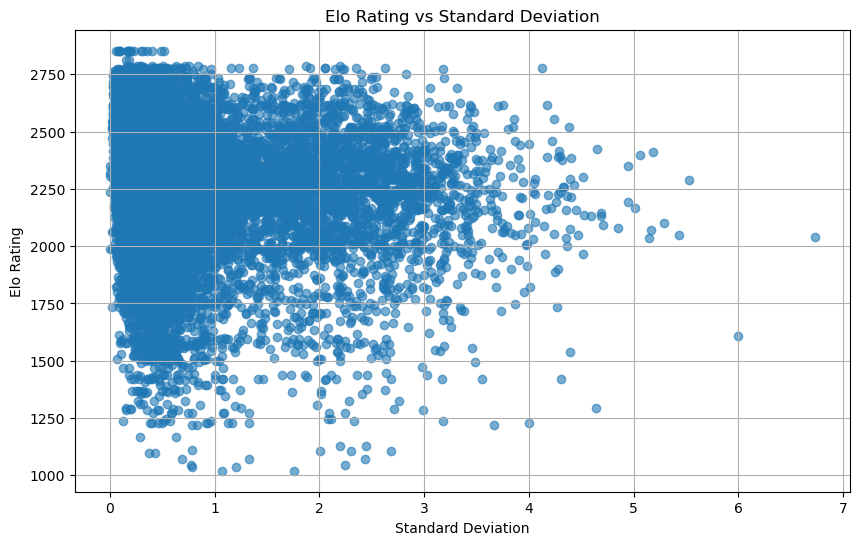

In [33]:
# Scatter plot of std vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_test_summary['Std_Dev_CPL'], df_test_summary['Elo'], alpha=0.6)
plt.title('Elo Rating vs Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### All Variables

In [34]:
import seaborn as sns

python(78582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [35]:
variables = [
    "Elo", "Avg_CPL", "Avg_WCL", "Contextual_Blunder_Rate",
    "Mistake_Rate", "Inaccuracy_Rate", "Opening_Mistake",
    "Endgame_Mistake", "Std_Dev_CPL", "TotalMoves"
]

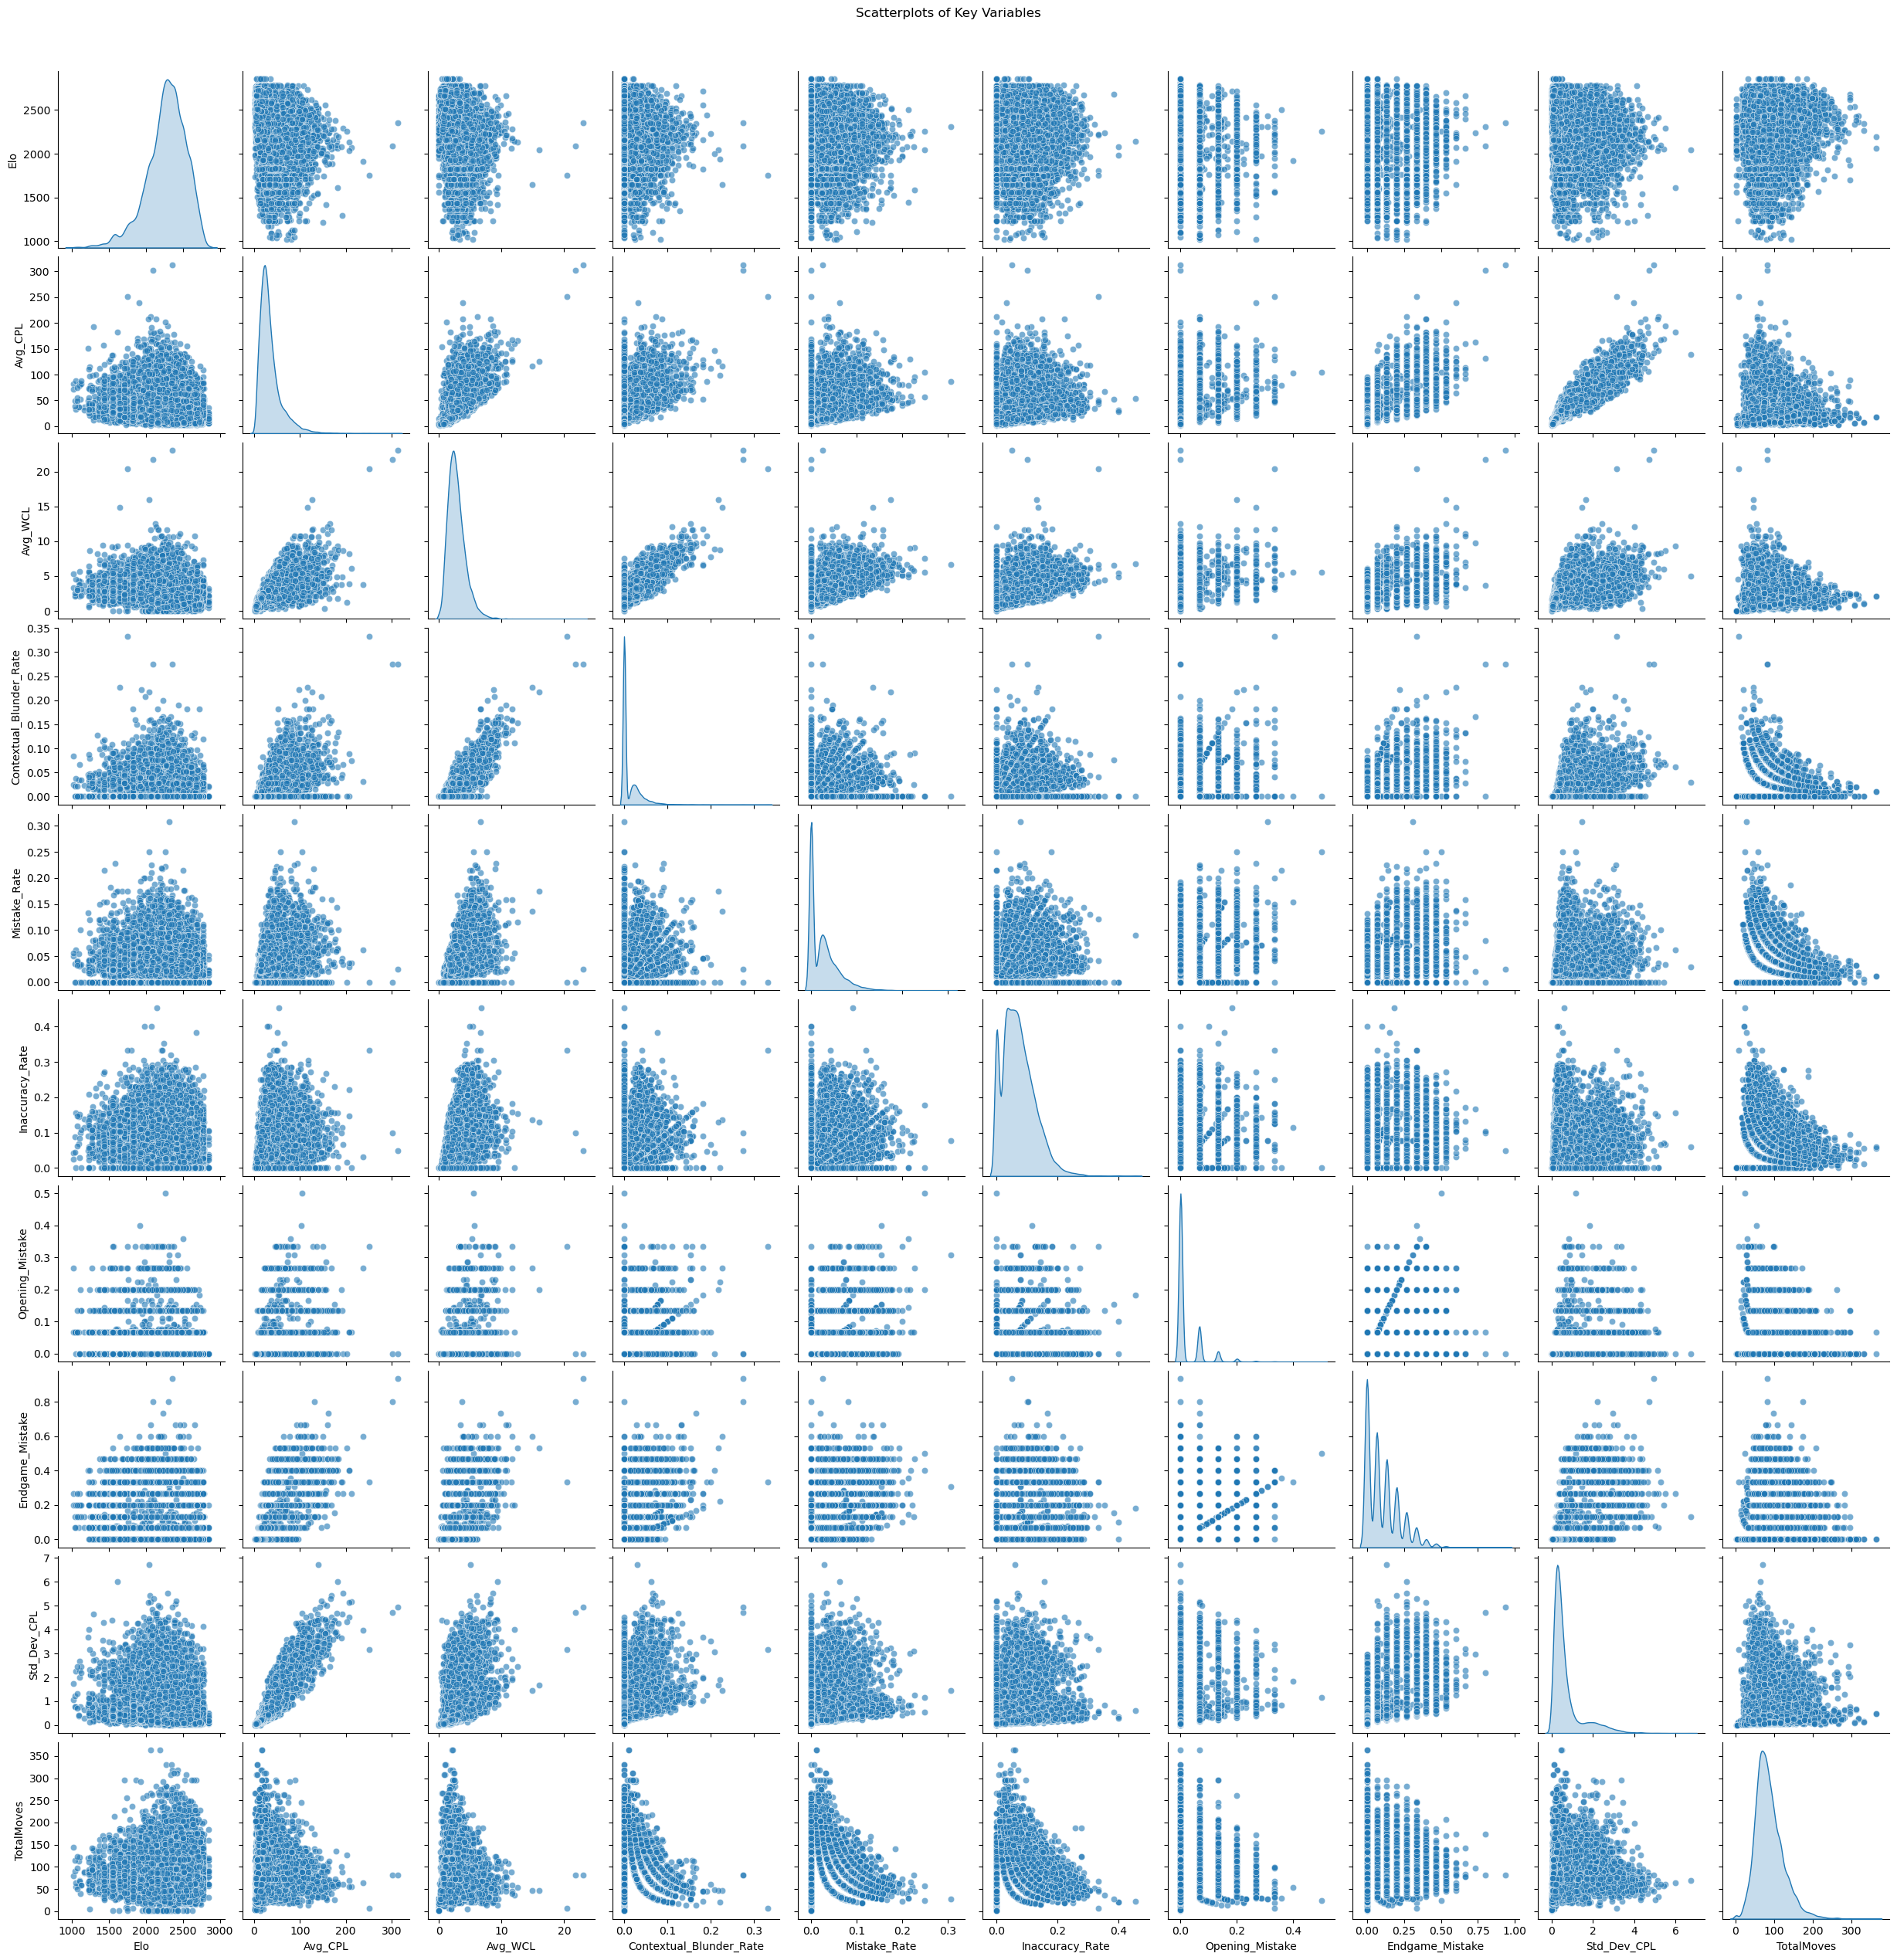

In [36]:
sns.pairplot(df_test_summary[variables], diag_kind="kde", plot_kws={"alpha": 0.6})

# Display the plot
plt.suptitle("Scatterplots of Key Variables", y=1.02)
plt.show()

### Results

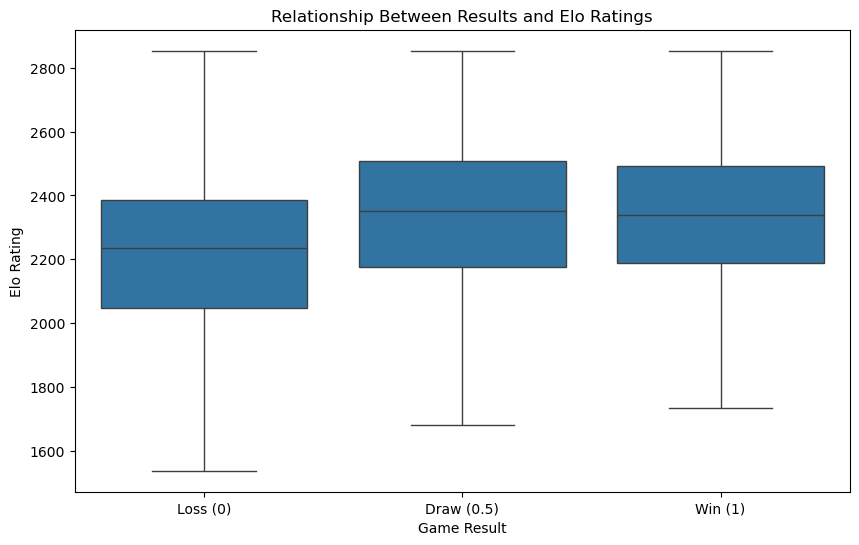

In [121]:
# Create a boxplot for results vs Elo
plt.figure(figsize=(10, 6))
sns.boxplot(x="Result", y="Elo", data=df_test_summary, showfliers=False)  # showfliers=False hides outliers for better clarity
plt.title("Relationship Between Results and Elo Ratings")
plt.xlabel("Game Result")
plt.ylabel("Elo Rating")
plt.xticks(ticks=[0, 1, 2], labels=["Loss (0)", "Draw (0.5)", "Win (1)"])
plt.show()

### Opening

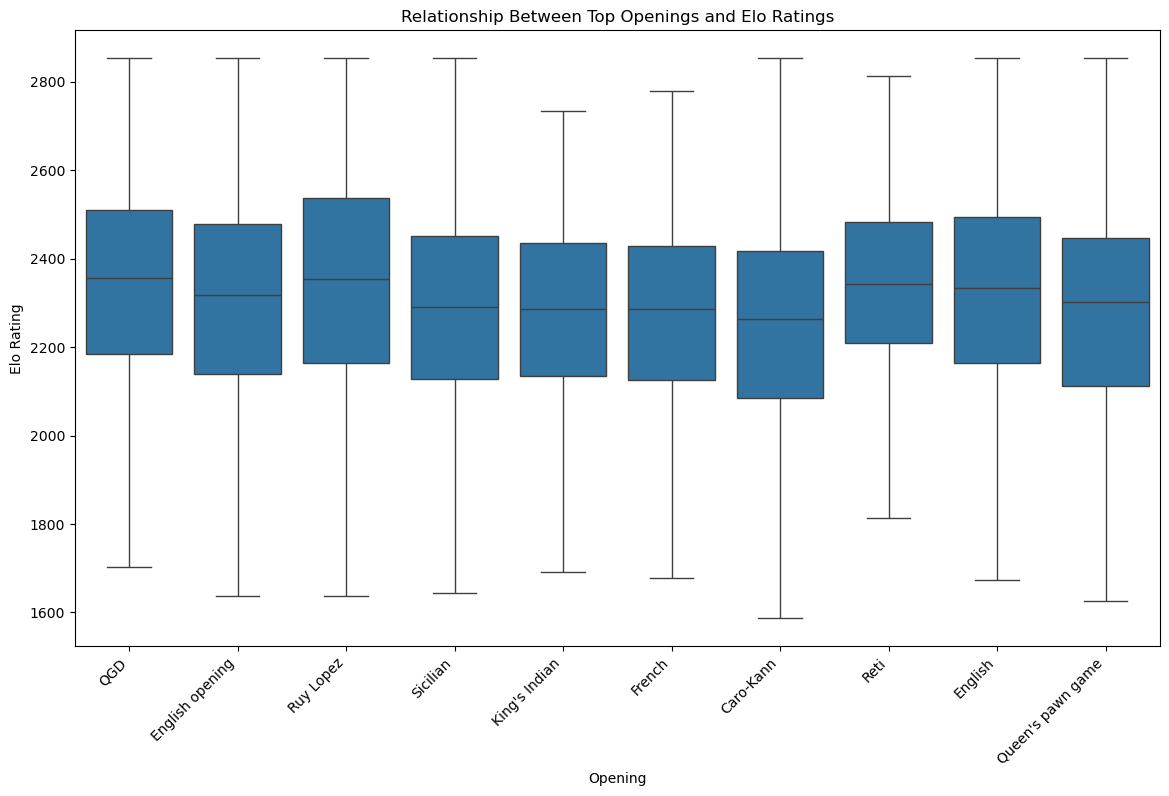

In [122]:
# Select the top 10 most frequent openings
top_openings = df_test_summary['Opening'].value_counts().head(10).index
df_top_openings = df_test_summary[df_test_summary['Opening'].isin(top_openings)]

# Create a boxplot for top openings vs Elo
plt.figure(figsize=(14, 8))
sns.boxplot(x="Opening", y="Elo", data=df_top_openings, showfliers=False)
plt.title("Relationship Between Top Openings and Elo Ratings")
plt.xlabel("Opening")
plt.ylabel("Elo Rating")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

## Regression Model for Test Dataset

### Split Training vs Testing

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

In [106]:
df_test_summary.shape

(19996, 17)

In [107]:
# Remove outliers where Avg_WCL > 15
df_test_summary = df_test_summary[df_test_summary['Avg_WCL'] <= 15]
df_test_summary.shape

(19996, 17)

In [108]:
# Split df_test_summary into two dataframes based on the 'Player' column
df_test_white = df_test_summary[df_test_summary['Player'] == 'White'].reset_index(drop=True)
df_test_black = df_test_summary[df_test_summary['Player'] == 'Black'].reset_index(drop=True)

# Display the shapes of the two new dataframes to verify the split
print(f"White dataframe shape: {df_test_white.shape}")
print(f"Black dataframe shape: {df_test_black.shape}")

White dataframe shape: (9999, 17)
Black dataframe shape: (9997, 17)


In [109]:
df_test_regression = df_test_white.dropna()

# Create bins for 'Elo' in df_summary
df_test_regression['Elo_bin'] = pd.cut(df_test_regression['Elo'], bins=np.arange(1200, 2800, 200), labels=False)

df_test_regression = df_test_regression.dropna(subset=['Elo_bin'])

# Set up features (X) and target (y)
X = df_test_regression.drop(columns=['Elo', 'Elo_bin', 'GameID', 'Player', 'Opening', 'Blunder_Rate', 'Std_Dev_WCL', 'Result', 'Opening_Mistake', 'Endgame_Mistake', 'Avg_CPL']) 
# One-hot encode the 'Opening' column
#X = pd.get_dummies(X, columns=['Opening'], drop_first=True)

y = df_test_regression['Elo']                            # Target: original Elo
stratify_bins = df_test_regression['Elo_bin']            # Binned 'Elo' for stratification

# Initialize StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the stratified split
for train_index, test_index in splitter.split(X, stratify_bins):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Checking the distribution of Elo bins in training and test sets
print("Training set Elo bin distribution:")
print(pd.Series(stratify_bins.iloc[train_index]).value_counts())

print("\nTest set Elo bin distribution:")
print(pd.Series(stratify_bins.iloc[test_index]).value_counts())

Training set Elo bin distribution:
Elo_bin
5.0    2619
6.0    1890
4.0    1520
3.0     627
2.0     246
1.0     131
0.0      36
Name: count, dtype: int64

Test set Elo bin distribution:
Elo_bin
5.0    655
6.0    473
4.0    380
3.0    157
2.0     62
1.0     32
0.0      9
Name: count, dtype: int64


/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_17410/2159410039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_regression['Elo_bin'] = pd.cut(df_test_regression['Elo'], bins=np.arange(1200, 2800, 200), labels=False)


### Linear Regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [110]:
# Apply Standard Scaling to the features on training and test sets separately
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 162.8622996917606
Mean Squared Error: 43930.17223805831
R² Score: 0.22161437377127158


In [111]:
# Print coefficients and their corresponding feature names
coefficients = model.coef_
features = X.columns
coef_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})
print(coef_df)

                   Feature  Coefficient
0                  Avg_WCL    -6.460110
1  Contextual_Blunder_Rate     6.409538
2             Mistake_Rate    -5.926112
3          Inaccuracy_Rate   -19.121093
4              Std_Dev_CPL   -24.393535
5               TotalMoves     2.521792
6          Opponent_Rating   106.574195


In [70]:
import scipy.stats as stats

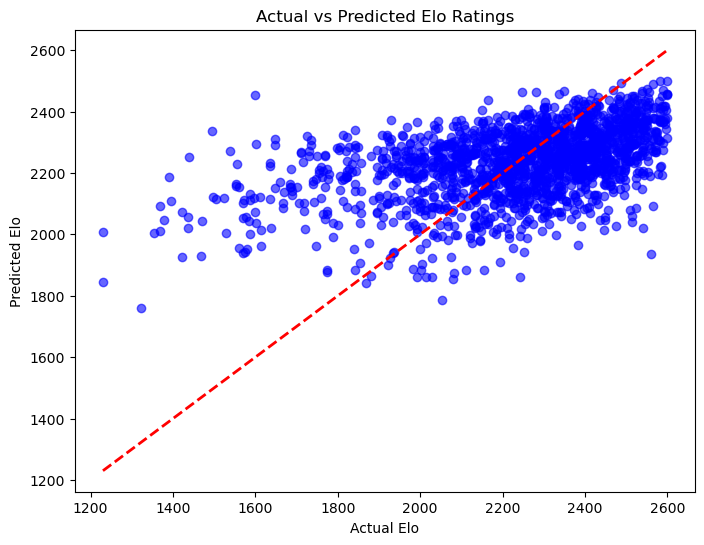

In [112]:
# Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Elo Ratings")
plt.xlabel("Actual Elo")
plt.ylabel("Predicted Elo")
plt.show()

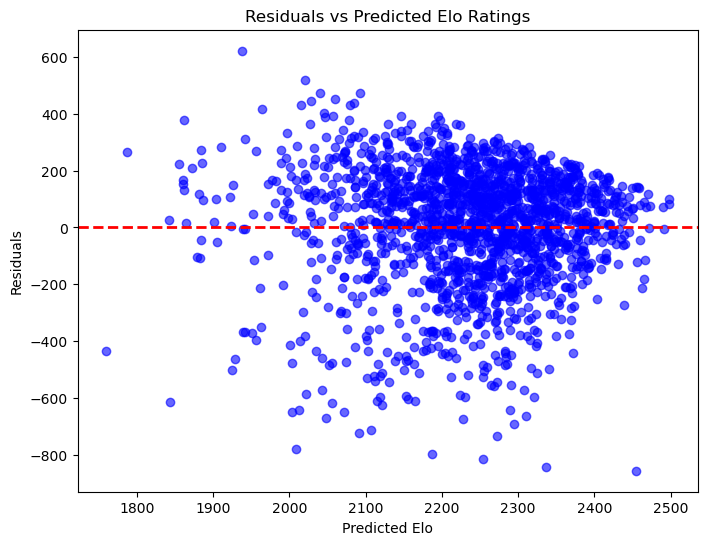

In [113]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted Elo Ratings")
plt.xlabel("Predicted Elo")
plt.ylabel("Residuals")
plt.show()

### Gradient Boosting

In [73]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Absolute Error: 182.29355909901972
Mean Squared Error: 55375.15952257835
R² Score: 0.01974275921927582


### Random Forest Regression

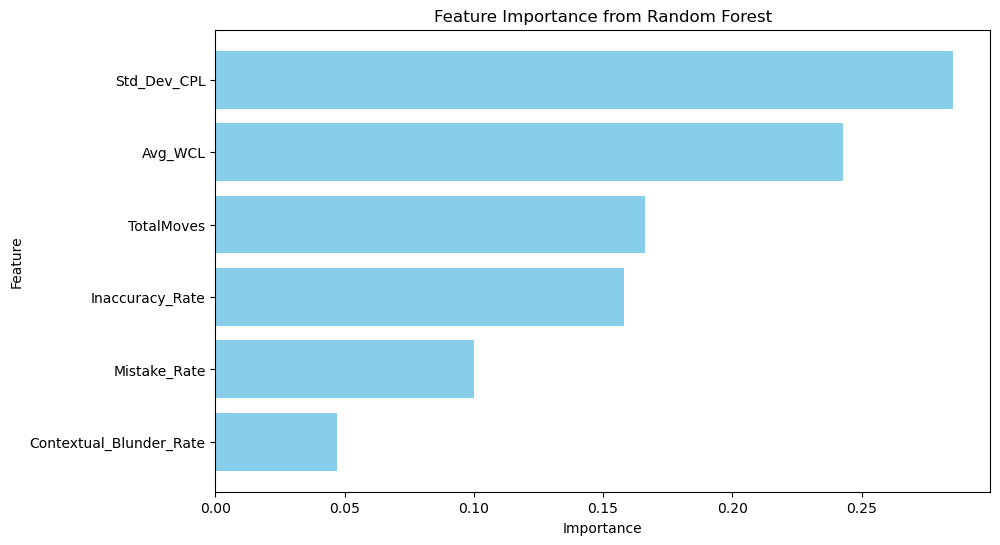

In [77]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()


### k-NN

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling to the features on training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN Regressor
knn = KNeighborsRegressor(n_neighbors=11, weights='uniform')  # You can experiment with n_neighbors and weights

# Train the k-NN Regressor
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print evaluation metrics
print("k-NN Regressor Performance:")
print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("R² Score:", r2_knn)


k-NN Regressor Performance:
Mean Absolute Error: 186.889092949699
Mean Squared Error: 58471.30448655517
R² Score: -0.03506554373843507


## Data Exploration on All Data

### Winning Chance Loss

In [80]:
df_white['Avg_WCL'].describe()

count    1.475298e+06
mean     2.780917e+00
std      1.374035e+00
min      0.000000e+00
25%      1.856952e+00
50%      2.546643e+00
75%      3.445391e+00
max      4.323826e+01
Name: Avg_WCL, dtype: float64

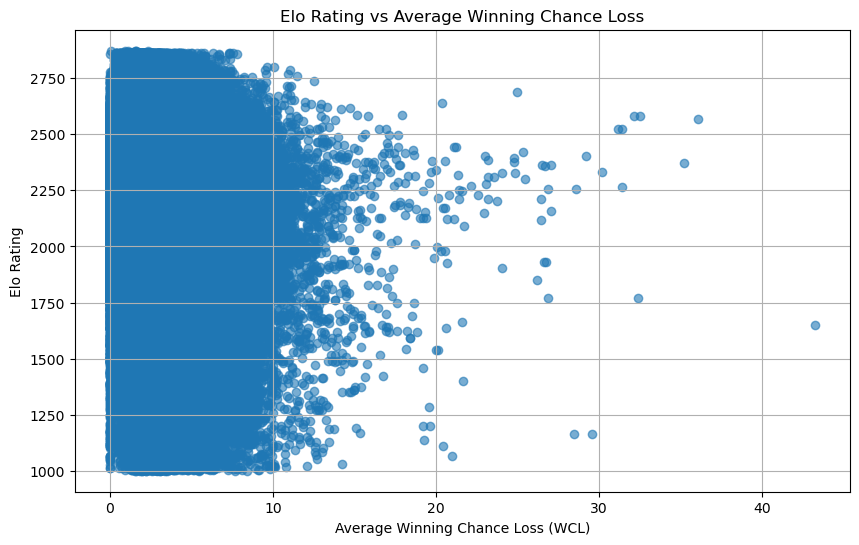

In [81]:
# Scatter plot of Avg_WCL vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_white['Avg_WCL'], df_white['Elo'], alpha=0.6)
plt.title('Elo Rating vs Average Winning Chance Loss')
plt.xlabel('Average Winning Chance Loss (WCL)')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Standard Deviation of CPL

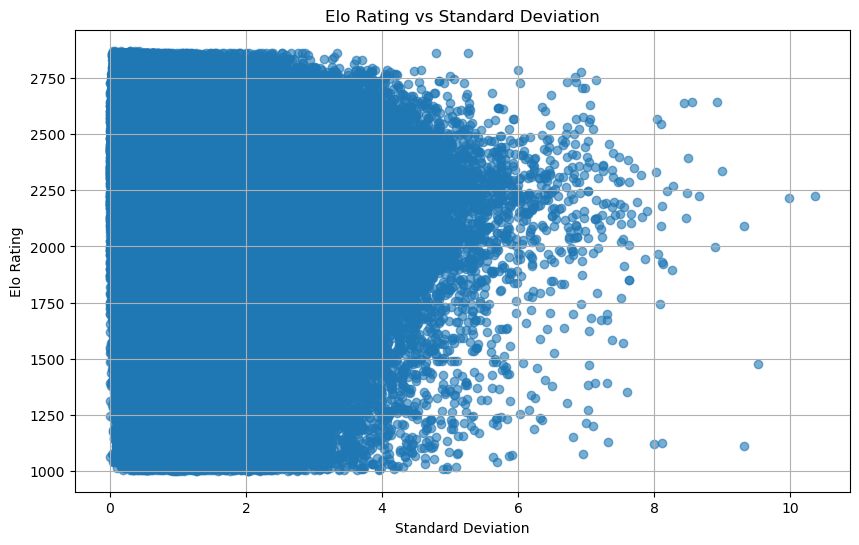

In [83]:
# Scatter plot of std vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_white['Std_Dev_CPL'], df_white['Elo'], alpha=0.6)
plt.title('Elo Rating vs Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Opponent Rating

In [100]:
df_white['Opponent_Rating'].describe()

count    1.449071e+06
mean     2.236983e+03
std      2.874132e+02
min      1.001000e+03
25%      2.086000e+03
50%      2.277000e+03
75%      2.433000e+03
max      2.872000e+03
Name: Opponent_Rating, dtype: float64

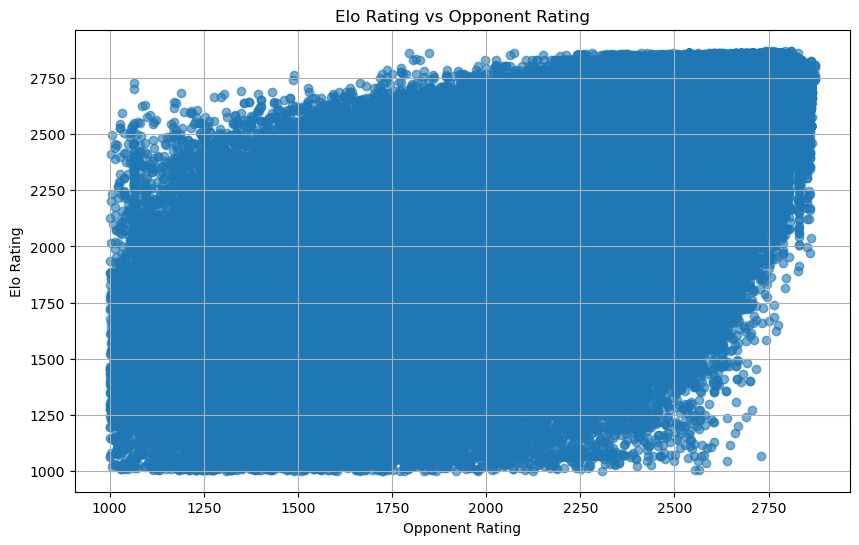

In [101]:
# Scatter plot of Opponent Rating vs Elo rating
plt.figure(figsize=(10, 6))
plt.scatter(df_white['Opponent_Rating'], df_white['Elo'], alpha=0.6)
plt.title('Elo Rating vs Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

## Regression on All Games

### Elo Distribution

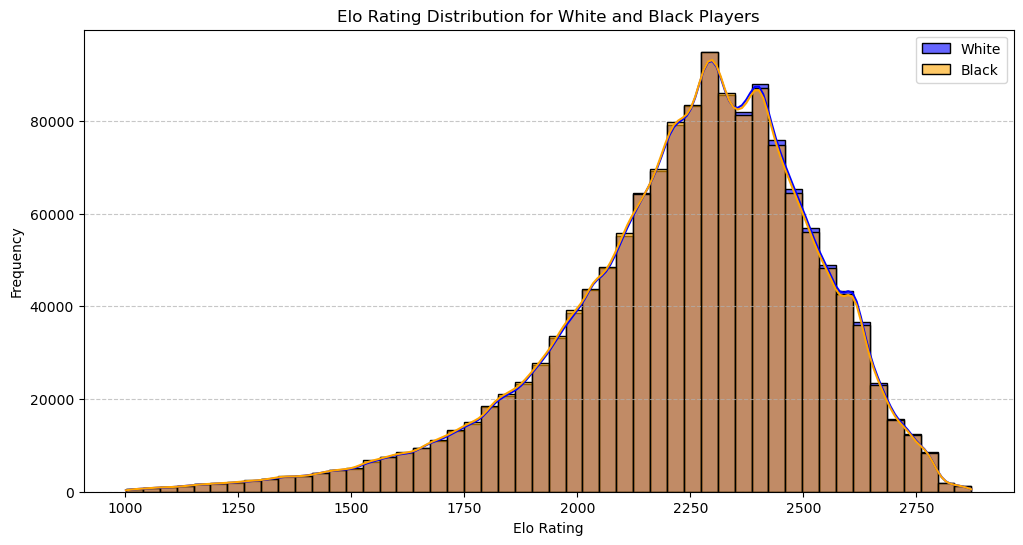

In [124]:
# Plot Elo distribution for df_white and df_black
plt.figure(figsize=(12, 6))

sns.histplot(df_white['Elo'], bins=50, kde=True, color='blue', label='White', alpha=0.6)
sns.histplot(df_black['Elo'], bins=50, kde=True, color='orange', label='Black', alpha=0.6)

plt.title('Elo Rating Distribution for White and Black Players')
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most games are around the 2200 - 2400 elo range, and there are much fewer games in the lower end (<1500) and upper end (>2750). This could be problematic if we want to accurately predict the elo for players in these underrepresented elo ranges.

In [116]:
print(df_white.columns)

Index(['GameID', 'Player', 'Avg_CPL', 'Avg_WCL', 'Blunder_Rate',
       'Contextual_Blunder_Rate', 'Mistake_Rate', 'Inaccuracy_Rate',
       'Std_Dev_CPL', 'Std_Dev_WCL', 'Opening_Mistake', 'Endgame_Mistake',
       'Result', 'Opening', 'TotalMoves', 'Elo', 'Opponent_Rating'],
      dtype='object')


### Pick Significant Variables

First, look at the correlation between the numerical variables with Elo rating to determine how good each predictor is. 

In [119]:
#Avg_CPL	Avg_WCL	Blunder_Rate	Contextual_Blunder_Rate	Mistake_Rate	Inaccuracy_Rate	Std_Dev_CPL	Std_Dev_WCL	Opening_Mistake	Endgame_Mistake	Result	Opening	TotalMoves	Elo	Opponent_Rating
numeric_columns = ['Avg_CPL', 'Avg_WCL', 'Blunder_Rate', 'Contextual_Blunder_Rate', 'Mistake_Rate', 'Inaccuracy_Rate', 'Std_Dev_CPL', 'Std_Dev_WCL', 'Opening_Mistake', 'Endgame_Mistake', 'TotalMoves', 'Elo', 'Opponent_Rating']
# Compute correlation with Elo
correlations = df_white[numeric_columns].corr()['Elo'].sort_values(ascending=False)
print(correlations)

Elo                        1.000000
Opponent_Rating            0.581647
TotalMoves                 0.056808
Contextual_Blunder_Rate   -0.102707
Mistake_Rate              -0.132500
Inaccuracy_Rate           -0.148119
Std_Dev_WCL               -0.153836
Std_Dev_CPL               -0.155425
Endgame_Mistake           -0.167316
Avg_WCL                   -0.185546
Blunder_Rate              -0.186519
Opening_Mistake           -0.198433
Avg_CPL                   -0.222769
Name: Elo, dtype: float64


Only 'Opponent_Rating' has a decent positive correlation with Elo rating of a player. There are potentials to explore other features that are more significantly correlates with Elo. 

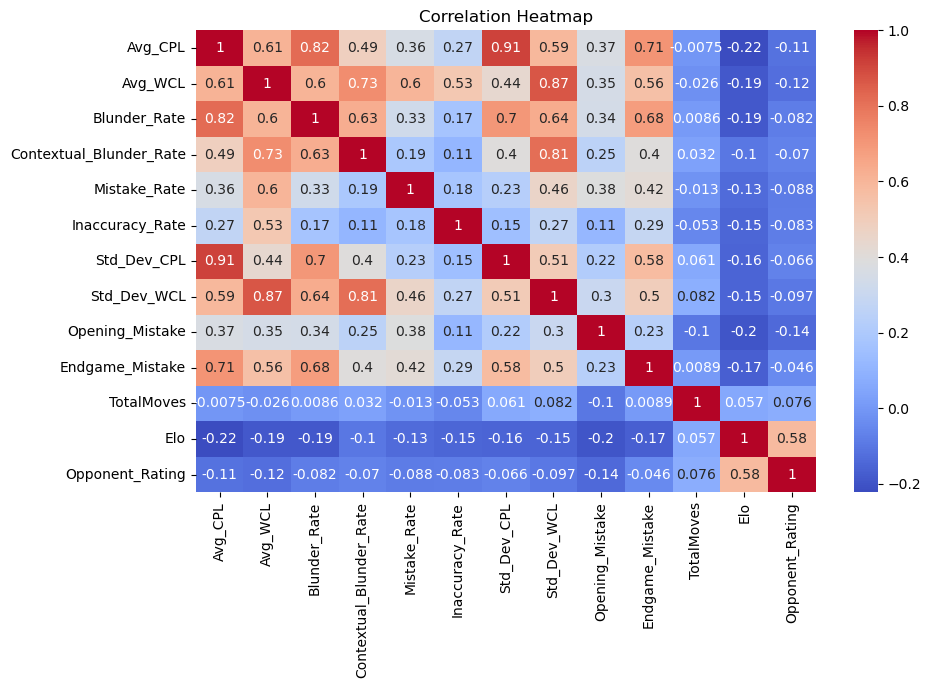

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_white[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### What about the Categorical Variables? 

Mean Elo by Result:
Result
0.0    2156.780888
0.5    2283.355567
1.0    2286.197050
Name: Elo, dtype: float64


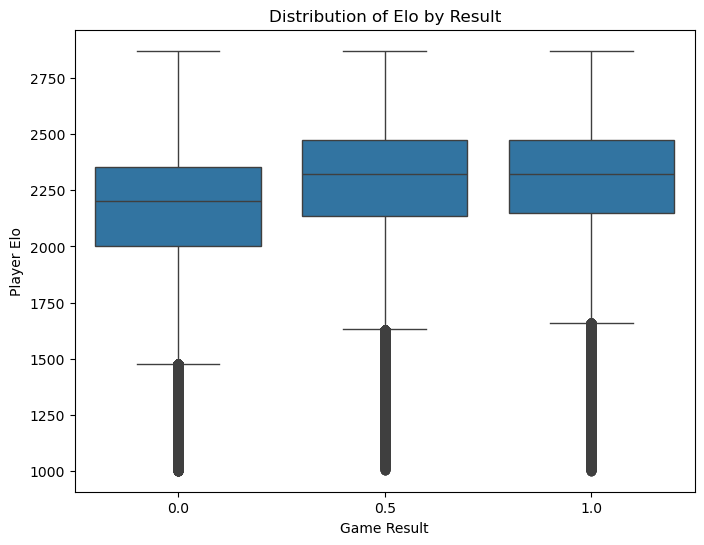

In [122]:
# Analyze Elo by game result
result_grouped = df_white.groupby('Result')['Elo'].mean().sort_values()
print("Mean Elo by Result:")
print(result_grouped)

# Visualize the distribution of Elo by Result
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_white, x='Result', y='Elo')
plt.title("Distribution of Elo by Result")
plt.xlabel("Game Result")
plt.ylabel("Player Elo")
plt.show()

Mean Elo by Top Openings:
Opening
Ruy Lopez            2304.651205
Reti opening         2289.591907
English              2284.916546
QGD                  2282.087532
English opening      2269.057247
King's Indian        2255.522597
Caro-Kann            2225.702706
French               2217.852155
Sicilian             2209.470339
Queen's pawn game    2208.086836
Name: Elo, dtype: float64


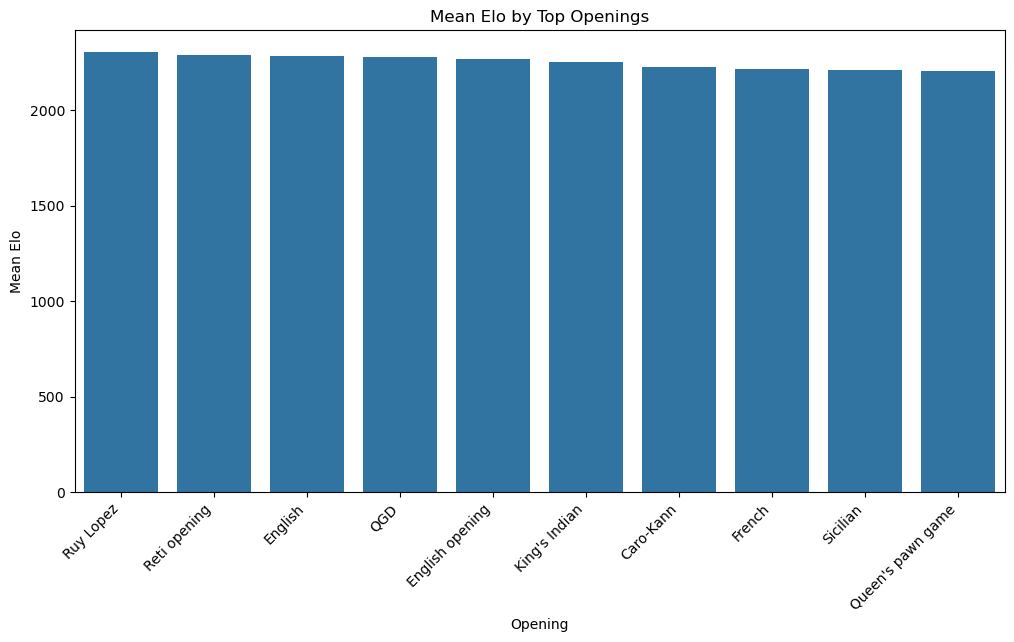

In [123]:
# Find the most frequent openings
top_openings = df_white['Opening'].value_counts().head(10).index

# Filter for only the top openings
df_top_openings = df_white[df_white['Opening'].isin(top_openings)]

# Group by opening and calculate the mean Elo
opening_grouped = df_top_openings.groupby('Opening')['Elo'].mean().sort_values(ascending=False)
print("Mean Elo by Top Openings:")
print(opening_grouped)

# Visualize mean Elo for the top openings
plt.figure(figsize=(12, 6))
sns.barplot(x=opening_grouped.index, y=opening_grouped.values)
plt.xticks(rotation=45, ha='right')
plt.title("Mean Elo by Top Openings")
plt.xlabel("Opening")
plt.ylabel("Mean Elo")
plt.show()


### Train Test Split
First, let's remove the outliers. I pick games with > 15 Avg_WCL as outliers (extremely low quality games). This threshold is debatable and should be further tested. 

In [129]:
print(df_white.shape)
# Remove outliers with Avg_WCL > 15
threshold_wcl = 15
df_white_cleaned = df_white[df_white['Avg_WCL'] <= threshold_wcl]
df_black_cleaned = df_black[df_black['Avg_WCL'] <= threshold_wcl]

print("Remaining white games:", len(df_white_cleaned))
print("Remaining black games:", len(df_black_cleaned))

(1475298, 17)
Remaining white games: 1475053
Remaining black games: 1475002


In [158]:
# White Player Train-Test Split
df_white_cleaned = df_white_cleaned.dropna()
df_white_cleaned['Elo_bin'] = pd.cut(df_white_cleaned['Elo'], bins=np.arange(1000, 2800, 200), labels=False)
df_white_cleaned = df_white_cleaned.dropna(subset=['Elo_bin'])

# Define features (X) and target (y)
X_white = df_white_cleaned.drop(columns=['Elo', 'Elo_bin', 'GameID', 'Player', 'Opening', 'Contextual_Blunder_Rate', 'Std_Dev_WCL', 'Result', 'TotalMoves'])
y_white = df_white_cleaned['Elo']
stratify_bins_white = df_white_cleaned['Elo_bin']

# Stratified Shuffle Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(X_white, stratify_bins_white):
    X_train_white, X_test_white = X_white.iloc[train_index], X_white.iloc[test_index]
    y_train_white, y_test_white = y_white.iloc[train_index], y_white.iloc[test_index]

print("Training set Elo bin distribution (White):")
print(pd.Series(stratify_bins_white.iloc[train_index]).value_counts())

print("\nTest set Elo bin distribution (White):")
print(pd.Series(stratify_bins_white.iloc[test_index]).value_counts())

# Black Player Train-Test Split
df_black_cleaned = df_black_cleaned.dropna()
df_black_cleaned['Elo_bin'] = pd.cut(df_black_cleaned['Elo'], bins=np.arange(1000, 2800, 200), labels=False)
df_black_cleaned = df_black_cleaned.dropna(subset=['Elo_bin'])

# Define features (X) and target (y)
X_black = df_black_cleaned.drop(columns=['Elo', 'Elo_bin', 'GameID', 'Player', 'Opening', 'Contextual_Blunder_Rate', 'Std_Dev_WCL', 'Result', 'TotalMoves'])
y_black = df_black_cleaned['Elo']
stratify_bins_black = df_black_cleaned['Elo_bin']

# Stratified Shuffle Split
for train_index, test_index in splitter.split(X_black, stratify_bins_black):
    X_train_black, X_test_black = X_black.iloc[train_index], X_black.iloc[test_index]
    y_train_black, y_test_black = y_black.iloc[train_index], y_black.iloc[test_index]

print("Training set Elo bin distribution (Black):")
print(pd.Series(stratify_bins_black.iloc[train_index]).value_counts())

print("\nTest set Elo bin distribution (Black):")
print(pd.Series(stratify_bins_black.iloc[test_index]).value_counts())

Training set Elo bin distribution (White):
Elo_bin
6    362734
7    261680
5    233730
4    111211
3     46139
2     20477
1      9147
0      3621
Name: count, dtype: int64

Test set Elo bin distribution (White):
Elo_bin
6    90684
7    65420
5    58433
4    27803
3    11535
2     5119
1     2286
0      905
Name: count, dtype: int64
Training set Elo bin distribution (Black):
Elo_bin
6    362934
7    257891
5    235280
4    113260
3     47198
2     20866
1      9409
0      3737
Name: count, dtype: int64

Test set Elo bin distribution (Black):
Elo_bin
6    90734
7    64473
5    58820
4    28315
3    11799
2     5217
1     2352
0      934
Name: count, dtype: int64


### Linear Regression Model

In [159]:
# Function to run regression for a given train/test split
def run_regression(X_train, X_test, y_train, y_test, player_color):
    # Apply Standard Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"\nResults for {player_color} Players:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Square Error (RMSE):", rmse)
    print("R² Score:", r2)
    
    return model

In [160]:
# White Player Regression
print("Running regression for White players...")
model_white = run_regression(X_train_white, X_test_white, y_train_white, y_test_white, "White")

Running regression for White players...

Results for White Players:
Mean Absolute Error (MAE): 165.7660549057749
Mean Squared Error (MSE): 45941.698216899225
Root Mean Square Error (RMSE): 214.34014606904424
R² Score: 0.32358402213858595


In [161]:
# Black Player Regression
print("Running regression for Black players...")
model_black = run_regression(X_train_black, X_test_black, y_train_black, y_test_black, "Black")

Running regression for Black players...

Results for Black Players:
Mean Absolute Error (MAE): 163.95925505391804
Mean Squared Error (MSE): 45021.85534332982
Root Mean Square Error (RMSE): 212.18354164102792
R² Score: 0.3434021764916271


In [162]:
# Get coefficients and intercept
coefficients = pd.DataFrame(
    {"Feature": X_train_white.columns, "Coefficient": model_white.coef_}
).sort_values(by="Coefficient", ascending=False)
intercept = model_white.intercept_

print(f"Intercept: {intercept}\n")
print(coefficients)

Intercept: 2210.522348267777

           Feature  Coefficient
8  Opponent_Rating   135.037231
5      Std_Dev_CPL    23.976756
1          Avg_WCL    16.234359
3     Mistake_Rate    -2.656320
2     Blunder_Rate    -8.272235
7  Endgame_Mistake   -10.857007
6  Opening_Mistake   -18.557827
4  Inaccuracy_Rate   -19.764081
0          Avg_CPL   -47.152056


In [163]:
def plot_regression_results(y_test, y_pred, player_color):
    # Actual vs Predicted Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
    plt.title(f"Actual vs Predicted Elo ({player_color} Players)")
    plt.xlabel("Actual Elo")
    plt.ylabel("Predicted Elo")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5, color="orange")
    plt.axhline(y=0, color='r', linestyle='--', label="Zero Residual Line")
    plt.title(f"Residuals Plot ({player_color} Players)")
    plt.xlabel("Predicted Elo")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.legend()
    plt.tight_layout()
    plt.show()

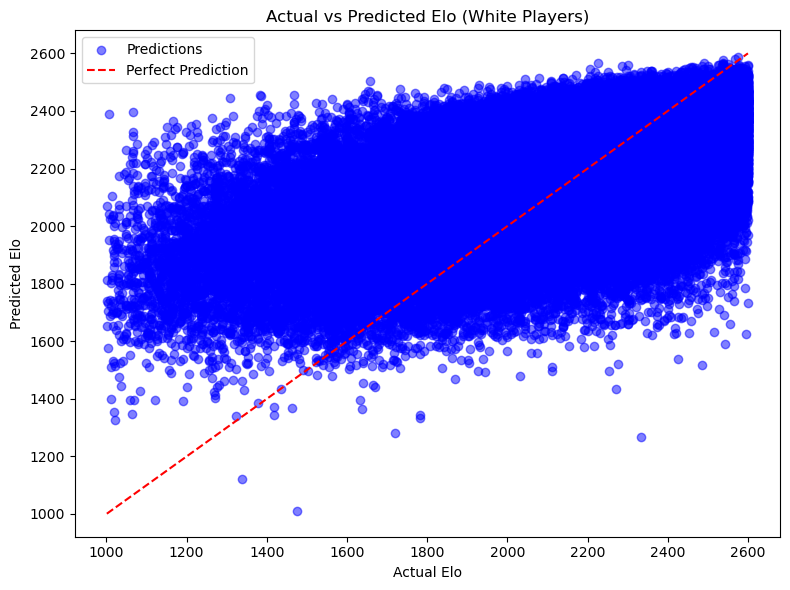

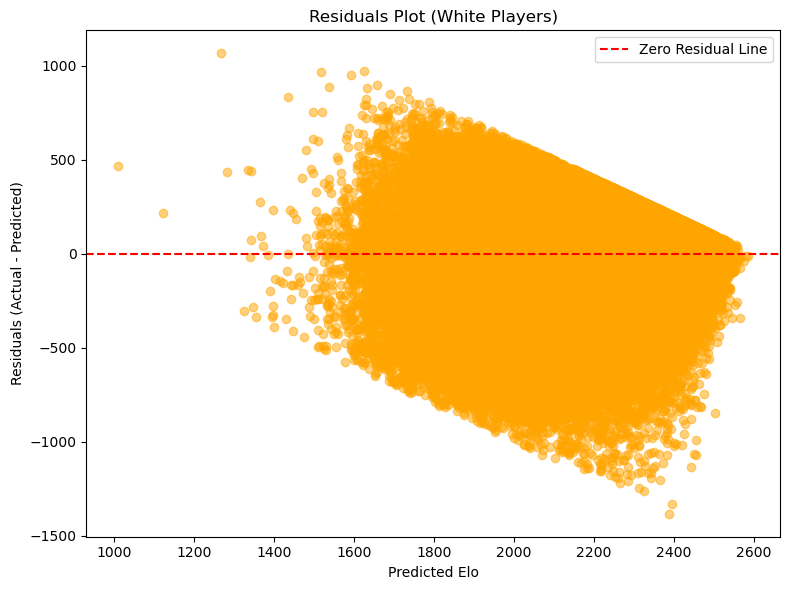

In [164]:
# Predict for White players
y_pred_white = model_white.predict(StandardScaler().fit_transform(X_test_white))
plot_regression_results(y_test_white, y_pred_white, "White")


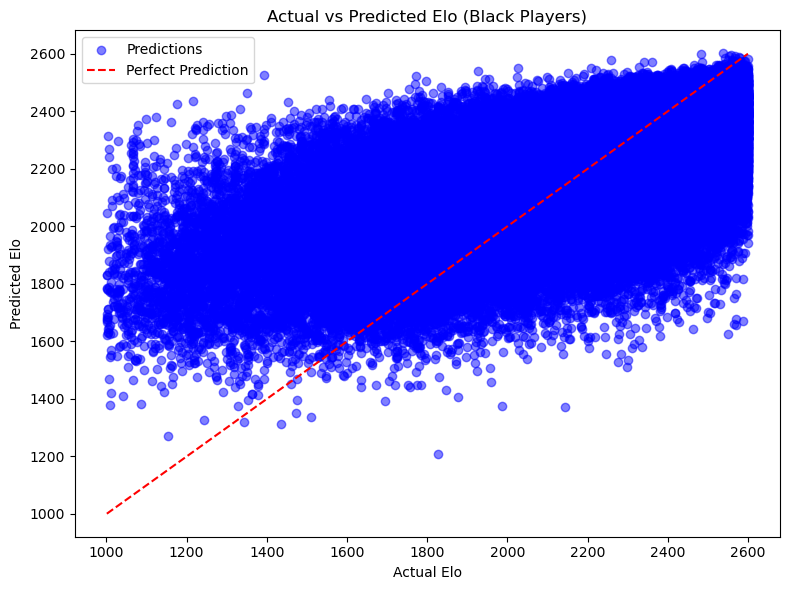

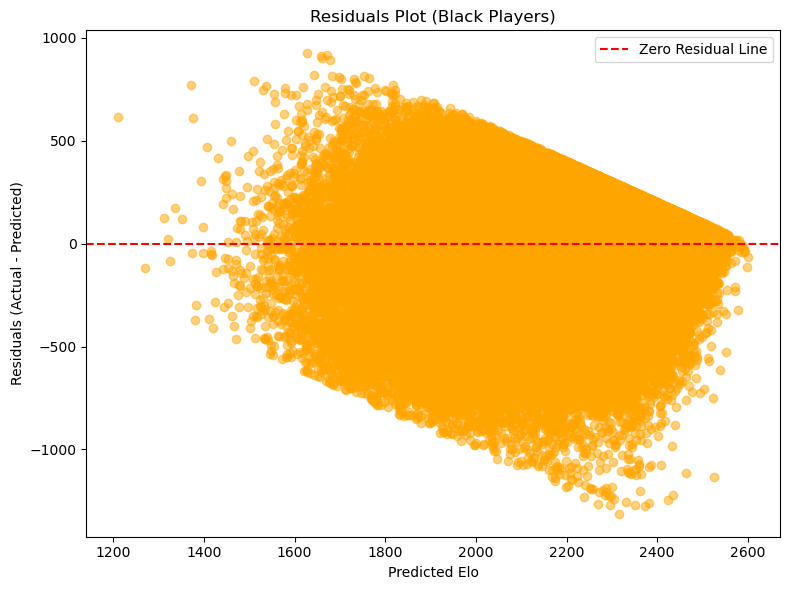

In [165]:
# Predict for Black players
y_pred_black = model_black.predict(StandardScaler().fit_transform(X_test_black))
plot_regression_results(y_test_black, y_pred_black, "Black")

### Maybe Balance the Training Data across all Elo Ranges? 



In [169]:
def balance_full_dataset(df, target_column, bins_column, bins):
    balanced_dfs = []
    for bin_value in bins:
        bin_data = df[df[bins_column] == bin_value]
        if not bin_data.empty:
            n_samples = min(len(bin_data), 20000)  # Adjust this number as needed
            balanced_dfs.append(bin_data.sample(n_samples, random_state=42, replace=len(bin_data) < n_samples))
    return pd.concat(balanced_dfs, axis=0).reset_index(drop=True)

In [171]:
# Remove original testing data from the cleaned datasets
train_indices_white = ~df_white_cleaned.index.isin(X_test_white.index)
train_indices_black = ~df_black_cleaned.index.isin(X_test_black.index)

df_white_training_only = df_white_cleaned[train_indices_white]
df_black_training_only = df_black_cleaned[train_indices_black]

# Balance the training data
bins_white = df_white_training_only['Elo_bin'].unique()
df_white_balanced = balance_full_dataset(df_white_training_only, 'Elo', 'Elo_bin', bins_white)

bins_black = df_black_training_only['Elo_bin'].unique()
df_black_balanced = balance_full_dataset(df_black_training_only, 'Elo', 'Elo_bin', bins_black)

# Verify distributions
print("Balanced White Training Distribution:")
print(df_white_balanced['Elo_bin'].value_counts())

print("\nBalanced Black Training Distribution:")
print(df_black_balanced['Elo_bin'].value_counts())

# Use the original testing data
X_test_balanced_white = X_test_white.copy()
y_test_balanced_white = y_test_white.copy()

X_test_balanced_black = X_test_black.copy()
y_test_balanced_black = y_test_black.copy()

# Define balanced training data for white and black
X_train_balanced_white = df_white_balanced.drop(columns=['Elo', 'Elo_bin', 'GameID', 'Player', 'Opening', 'Contextual_Blunder_Rate', 
                                                         'Std_Dev_WCL', 'Result', 'TotalMoves'])
y_train_balanced_white = df_white_balanced['Elo']

X_train_balanced_black = df_black_balanced.drop(columns=['Elo', 'Elo_bin', 'GameID', 'Player', 'Opening', 'Contextual_Blunder_Rate', 
                                                         'Std_Dev_WCL', 'Result', 'TotalMoves'])
y_train_balanced_black = df_black_balanced['Elo']

# Verify shapes
print("Shape of Balanced Training Data (White):", X_train_balanced_white.shape)
print("Shape of Balanced Testing Data (White):", X_test_balanced_white.shape)
print("Shape of Balanced Training Data (Black):", X_train_balanced_black.shape)
print("Shape of Balanced Testing Data (Black):", X_test_balanced_black.shape)

Balanced White Training Distribution:
Elo_bin
7    20000
4    20000
6    20000
5    20000
3    20000
2    20000
1     9147
0     3621
Name: count, dtype: int64

Balanced Black Training Distribution:
Elo_bin
7    20000
4    20000
6    20000
5    20000
3    20000
2    20000
1     9409
0     3737
Name: count, dtype: int64
Shape of Balanced Training Data (White): (132768, 9)
Shape of Balanced Testing Data (White): (262185, 9)
Shape of Balanced Training Data (Black): (133146, 9)
Shape of Balanced Testing Data (Black): (262644, 9)


In [174]:
# White Player Regression
print("Running regression for White players...")
model_white_balanced = run_regression(X_train_balanced_white, X_test_balanced_white, y_train_balanced_white, y_test_balanced_white, "White")

Running regression for White players...

Results for White Players:
Mean Absolute Error (MAE): 219.08221273555978
Mean Squared Error (MSE): 71996.63539777322
Root Mean Square Error (RMSE): 268.32188766064763
R² Score: -0.060032093402301756


OK, the result is very poor. Maybe this does not help. 

### Will Nonlinear Models help? Random Forest Regression

In [182]:
from sklearn.ensemble import RandomForestRegressor

def run_random_forest(X_train, X_test, y_train, y_test, player_color):
    # Apply Standard Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"\nResults for {player_color} Players (Random Forest):")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Square Error (RMSE):", rmse)
    print("R² Score:", r2)
    
    return model

In [183]:
model_white_rf = run_random_forest(X_train_white, X_test_white, y_train_white, y_test_white, "White")


Results for White Players (Random Forest):
Mean Absolute Error (MAE): 162.0657393362047
Mean Squared Error (MSE): 44111.66217789782
Root Mean Square Error (RMSE): 210.02776525473442
R² Score: 0.3505282942244493


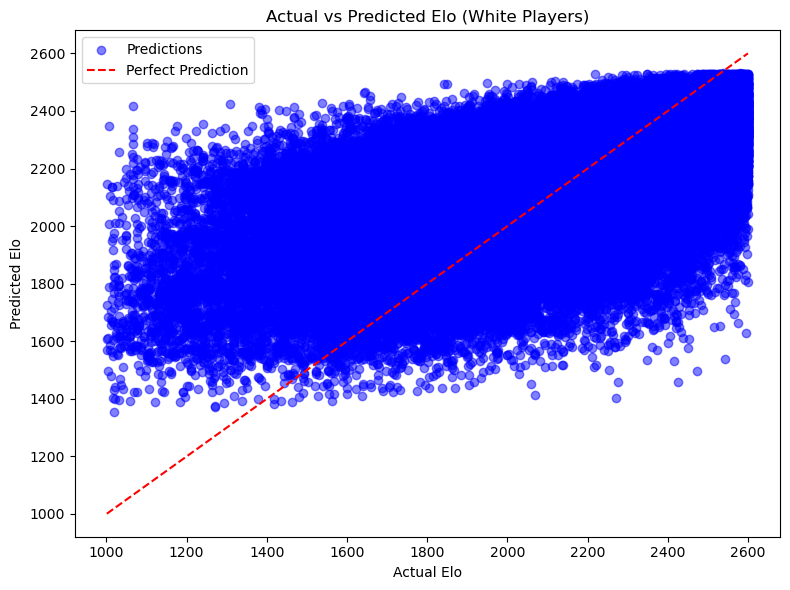

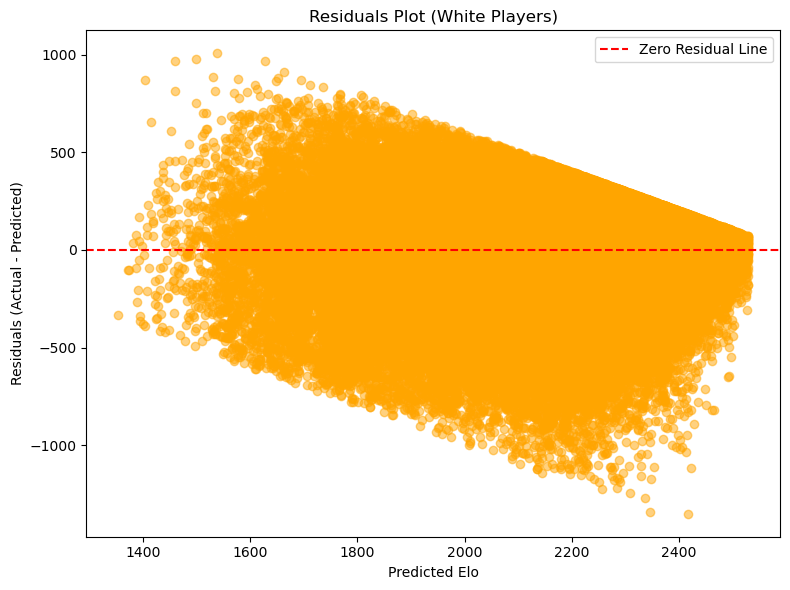

In [184]:
# Predict for White players
y_pred_rf_white = model_white_rf.predict(StandardScaler().fit_transform(X_test_white))
plot_regression_results(y_test_white, y_pred_rf_white, "White")

## Sequence Modeling to Predict Elo? 